## DataSynthsizer 

In [1]:
pip install DataSynthesizer

## Random mode

In [1]:
import numpy as np
import pandas as pd
import sdv
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network


## Loading Data

In [2]:
# input dataset
input_data = 'german_credit_data.csv'
# location of two output files
mode = 'random_mode'
description_file = f'{mode}description.json'
synthetic_data = f'{mode}sythetic_data.csv'

In [3]:
#threshold_value
threshold_value = 10

#categorical objects
categorical_attributes = {
    "checking_status": True,
        "duration": False,
        "credit_history":True,
        "purpose": False,
        "credit_amount": False,
        "savings_status":True,
        "employment": True,
        "installment_commitment": False,
        "personal_status": True,
        "other_parties": True,
        "residence_since": False,
        "property_magnitude": True,
        "age": False,
        "other_payment_plans": True,
        "housing": True,
        "existing_credits": False,
        "job": True,
        "num_dependents": False,
        "own_telephone":True,
        "foreign_worker": True,
        "class": True
    
}

epsilon = 0.2

num_tuples_to_generate = 30000 

## DataDescriber

In [4]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_random_mode(input_data)
describer.save_dataset_description_to_file(description_file)

In [5]:
generator = DataGenerator()
generator.generate_dataset_in_random_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

In [6]:
# Read both datasets using Pandas.
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_synt.iteritems():
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dis

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\ModelInspector.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(15, 5), dpi=120)
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_synt.iteritems():


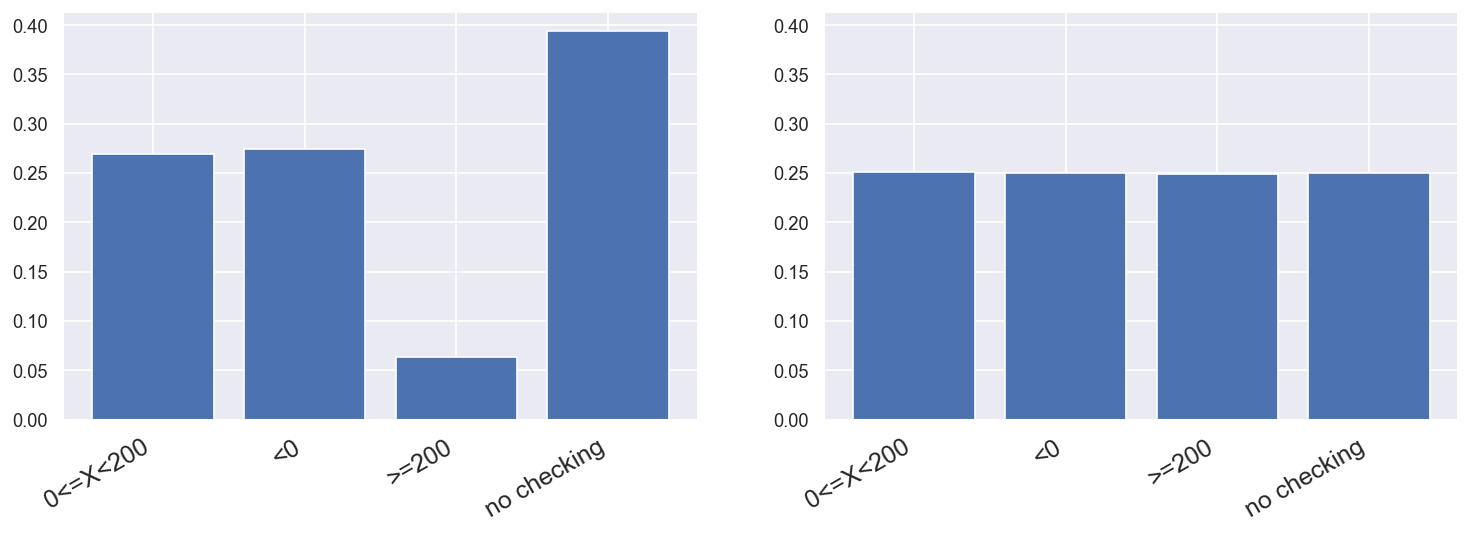

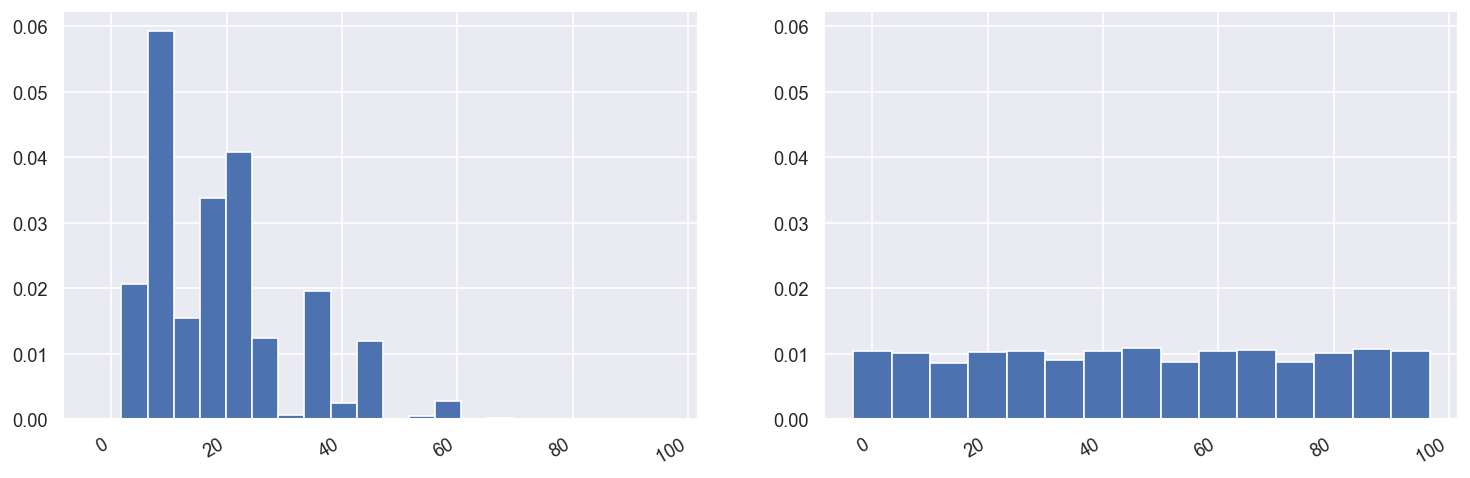

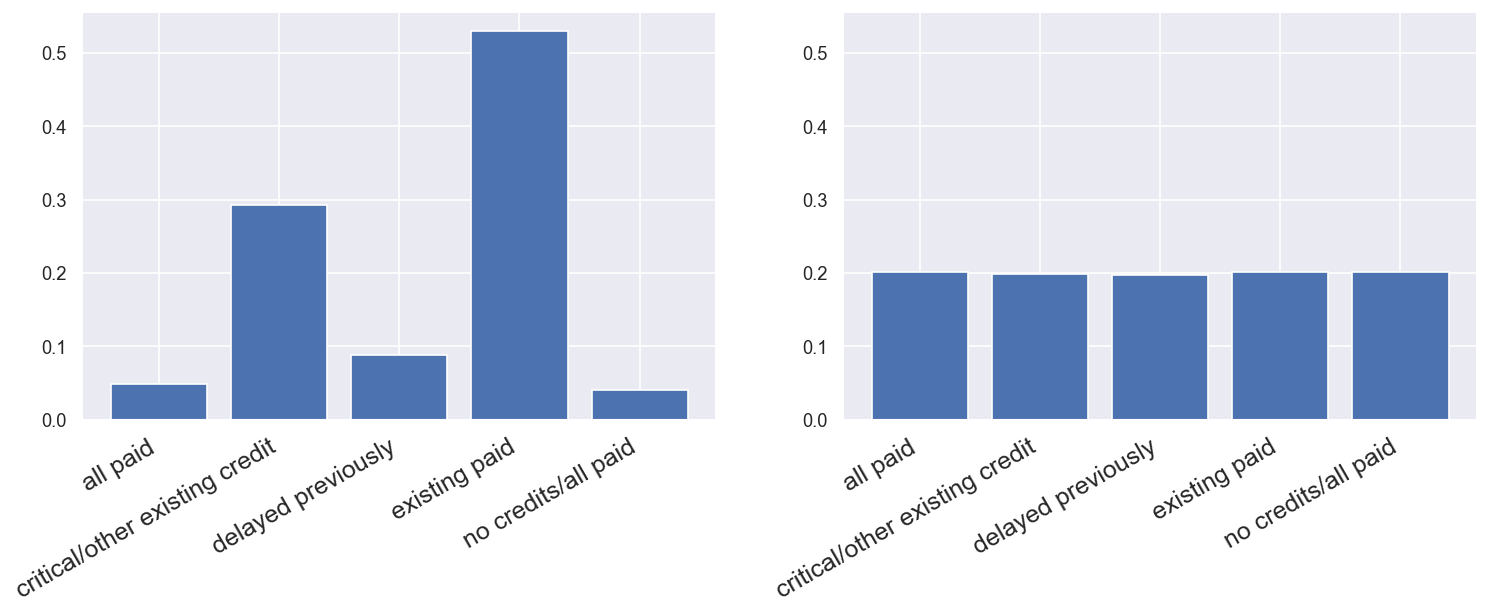

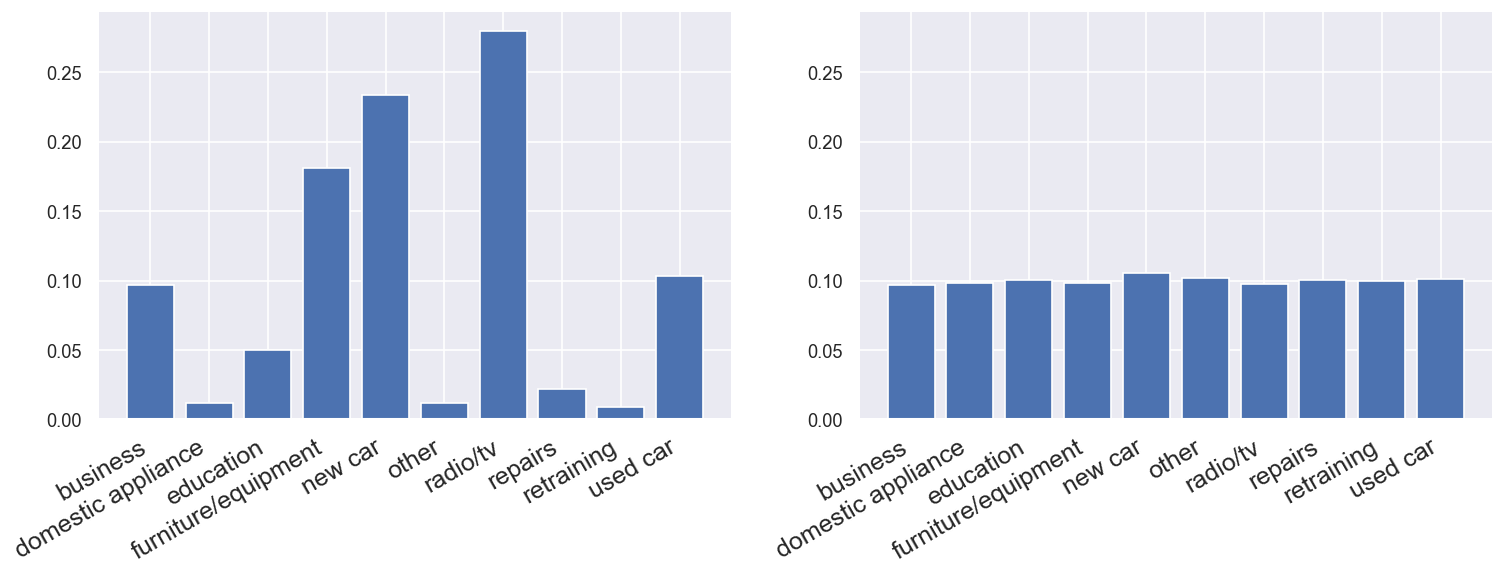

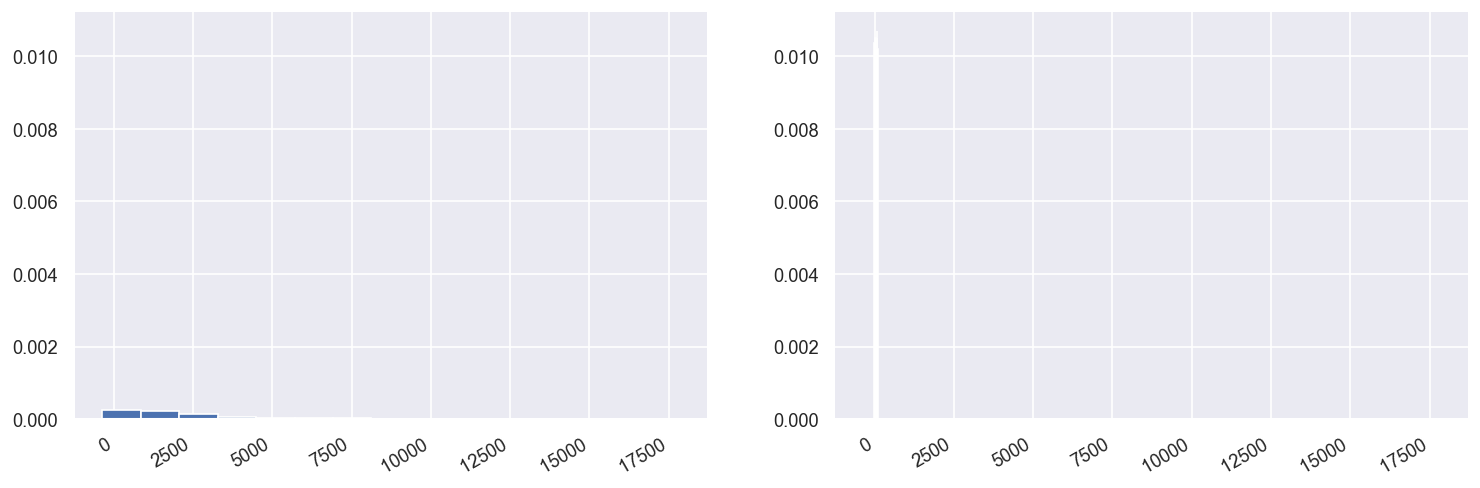

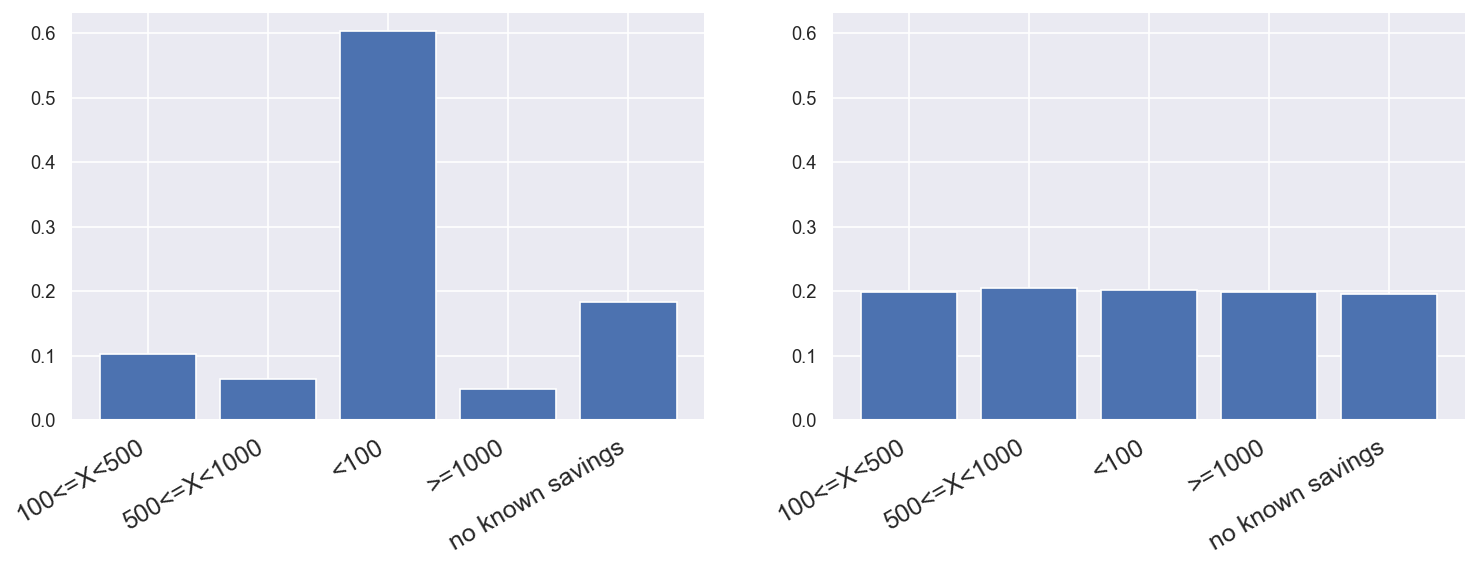

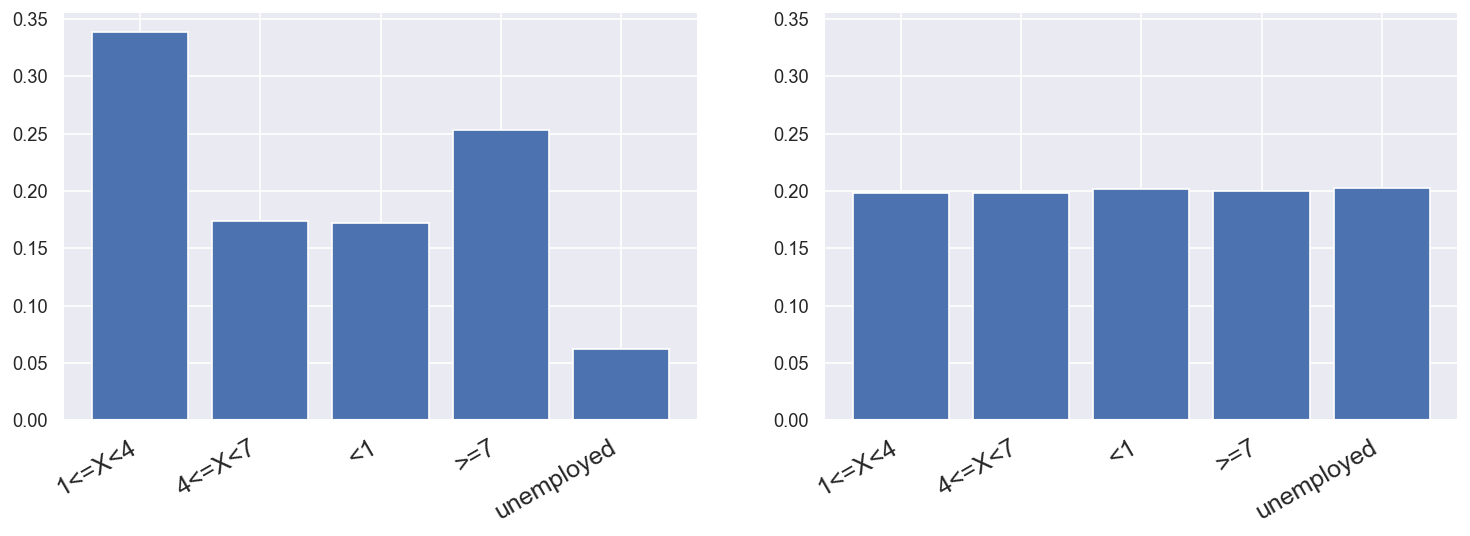

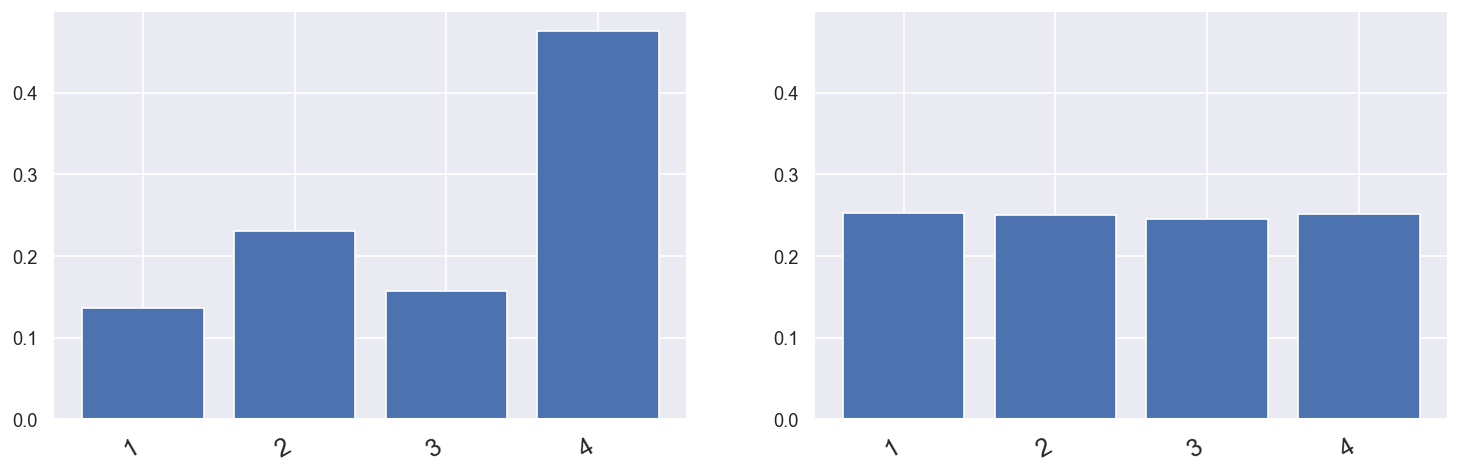

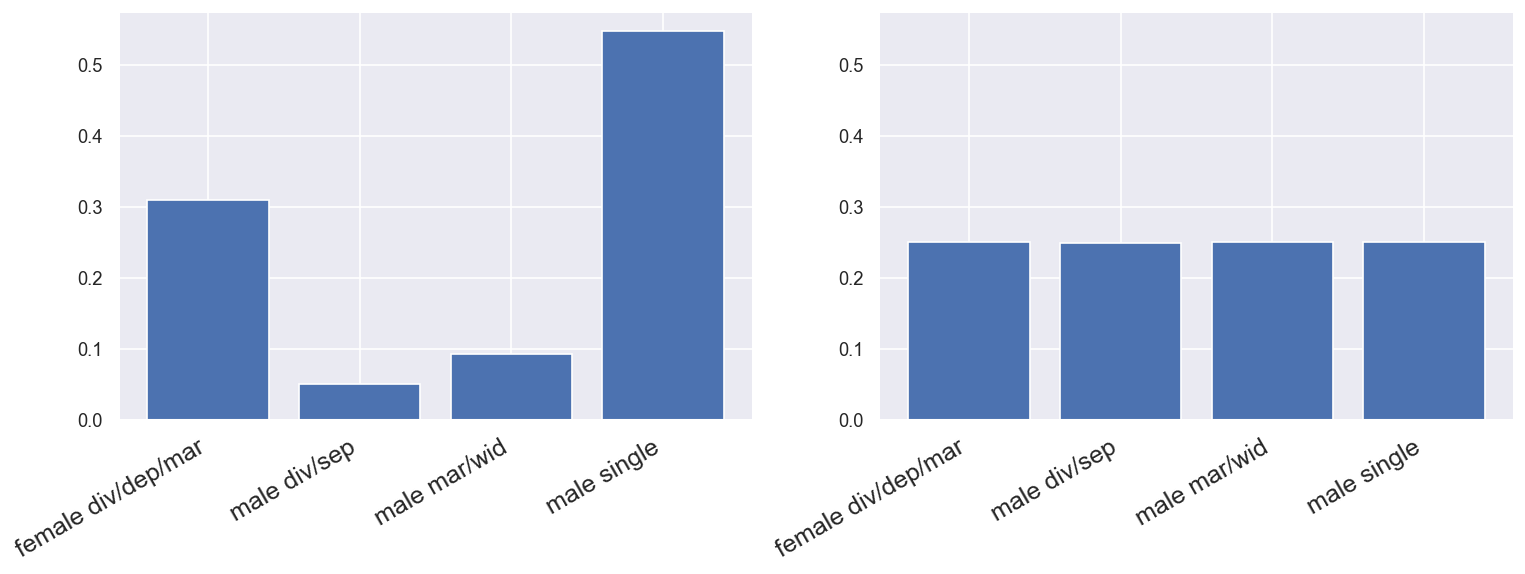

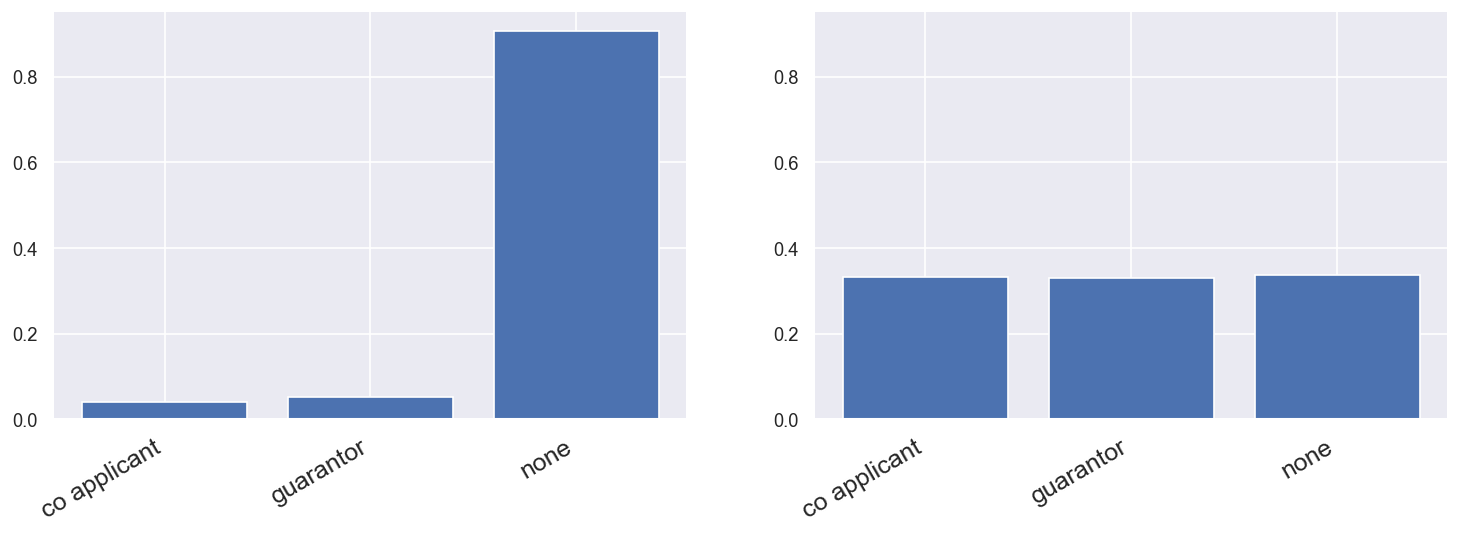

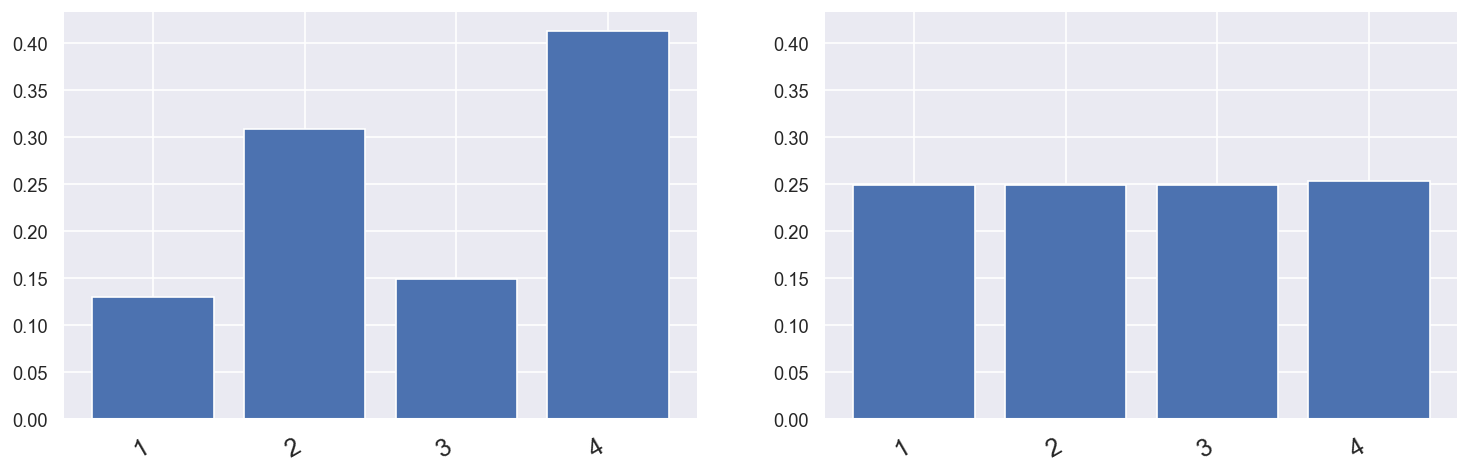

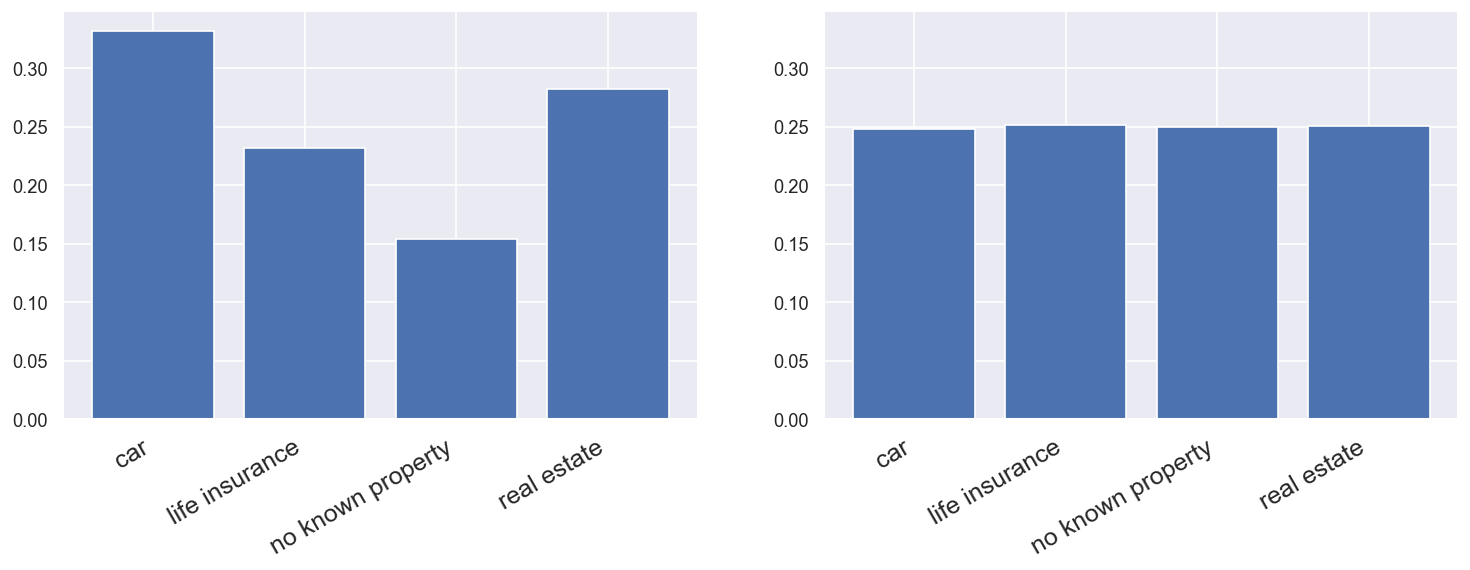

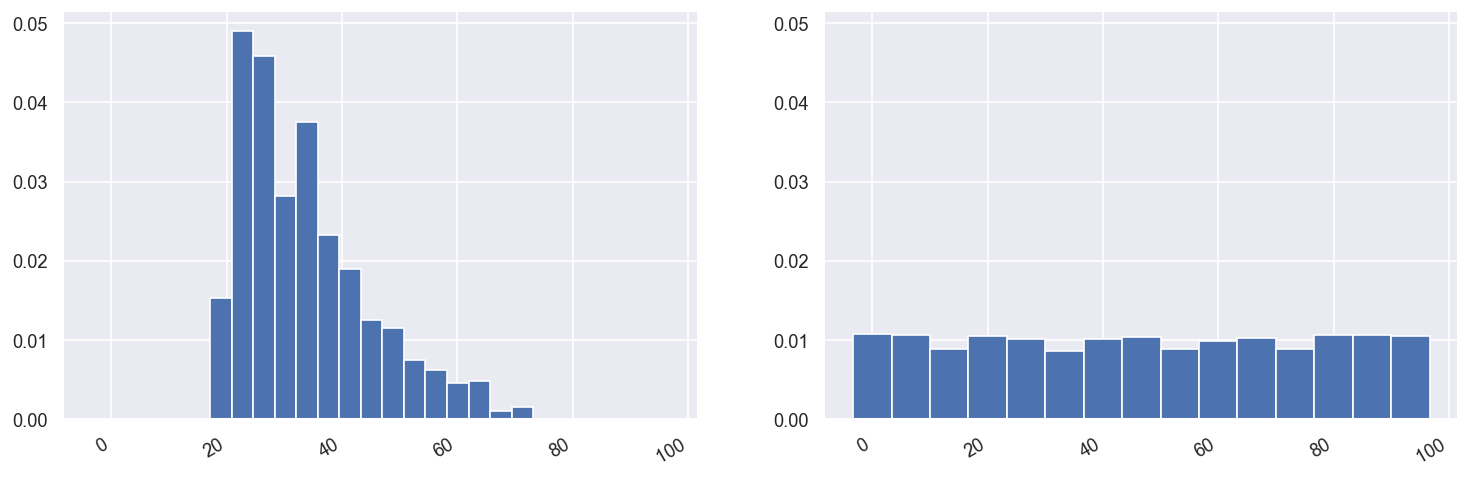

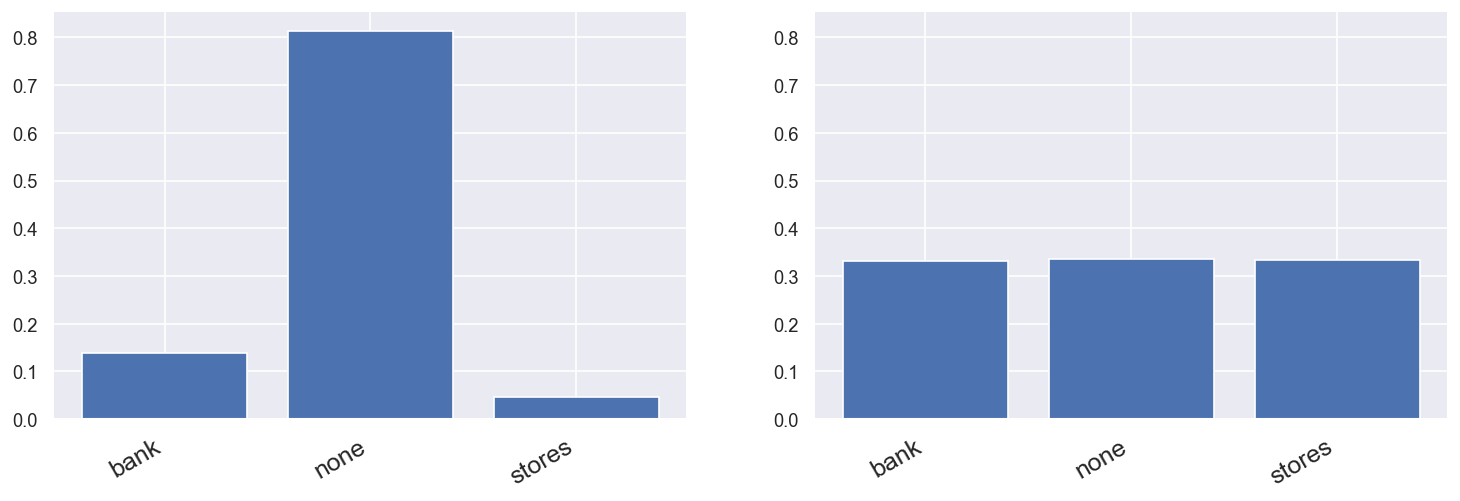

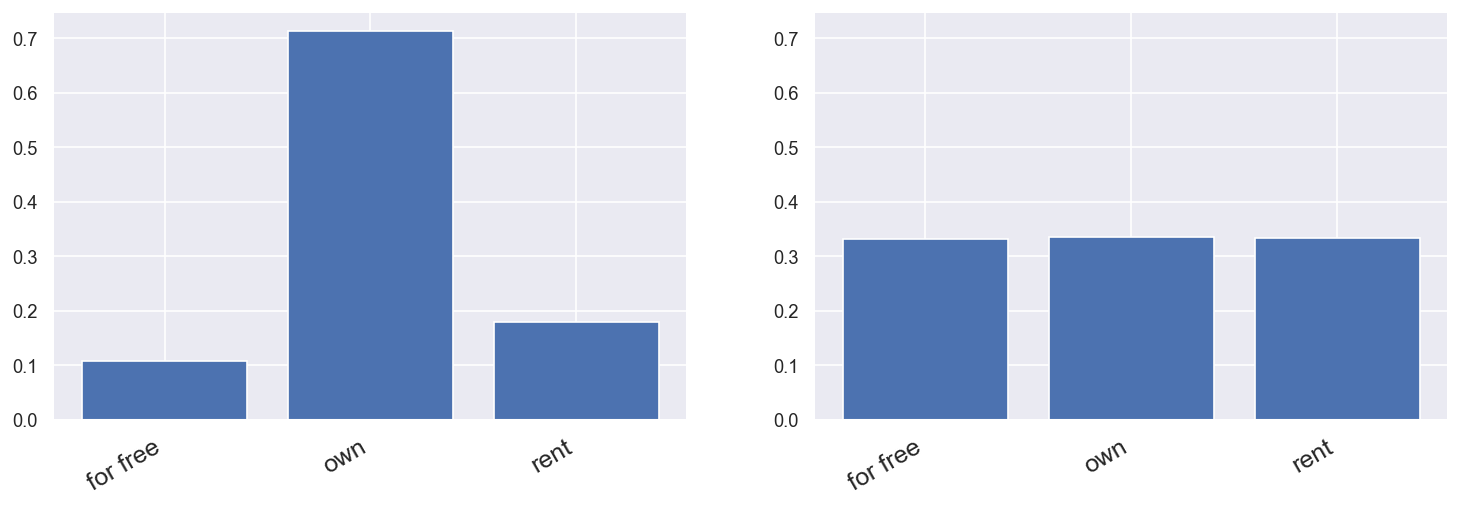

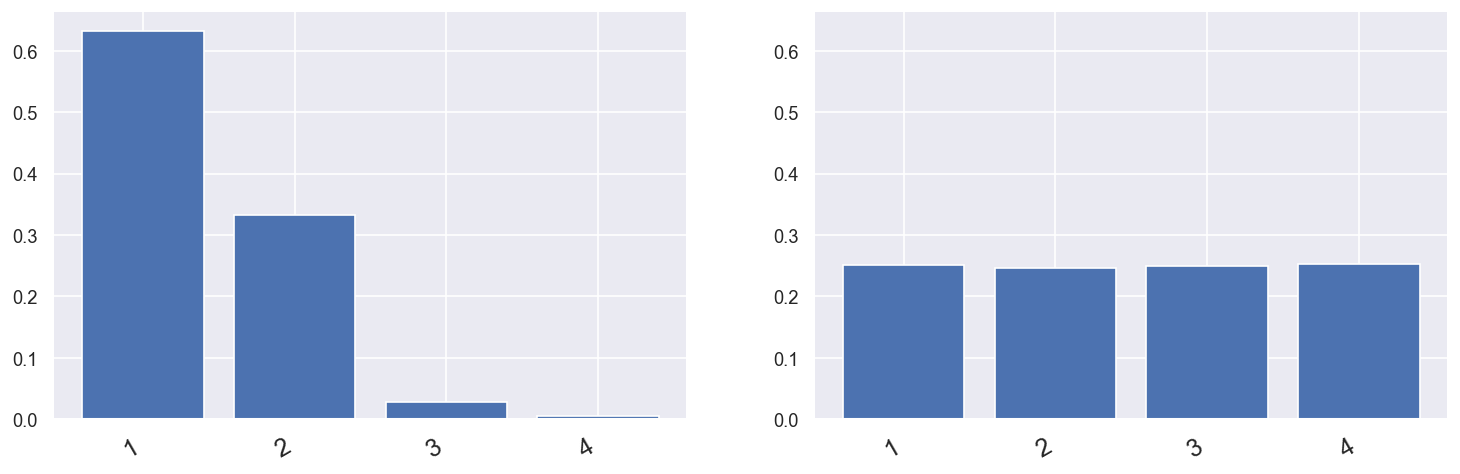

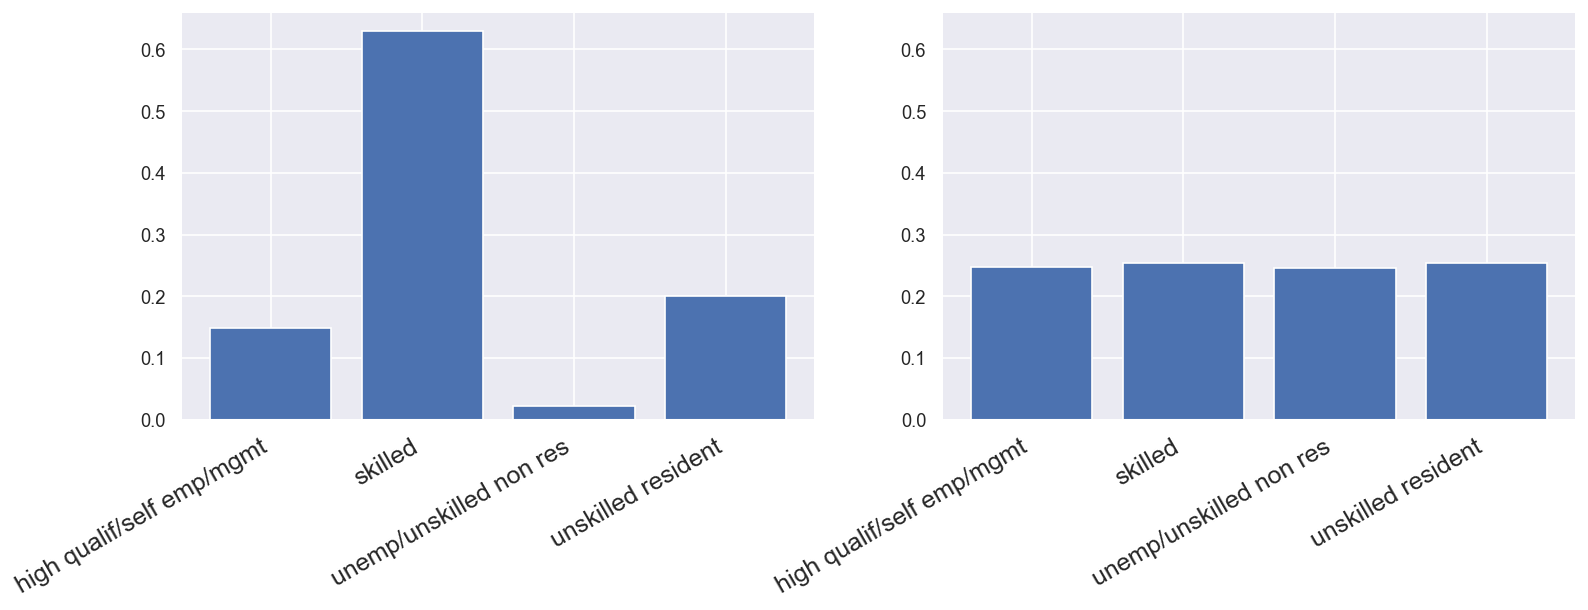

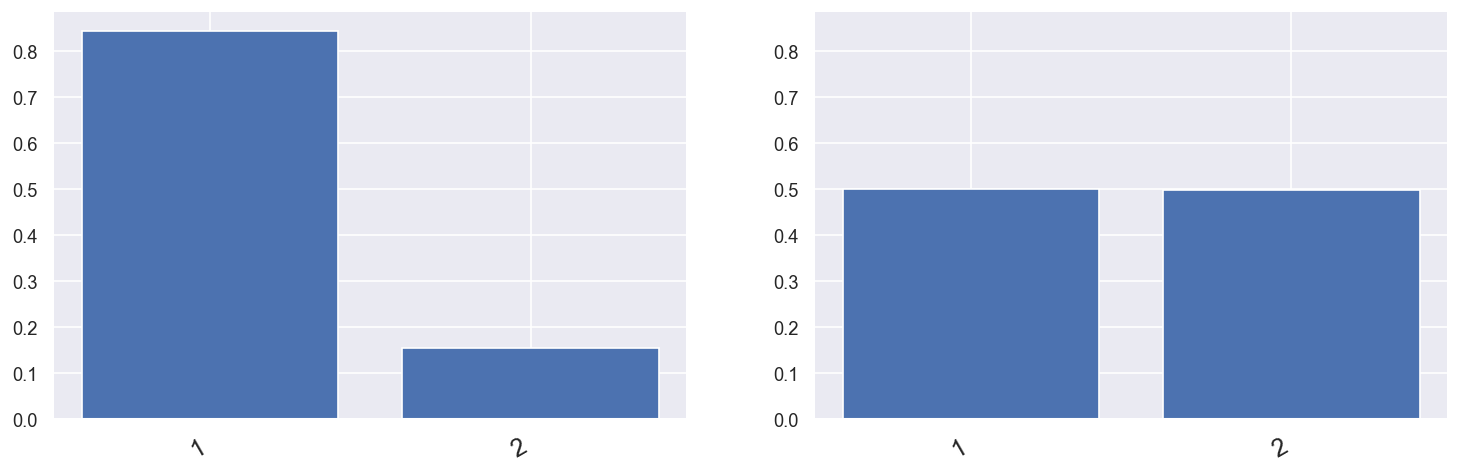

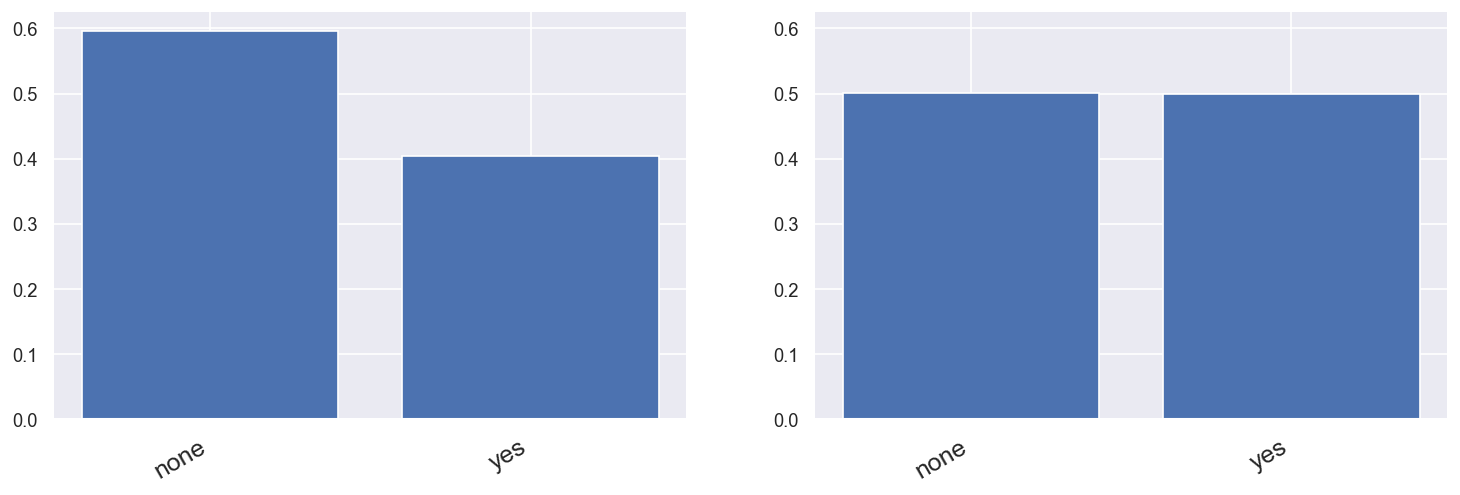

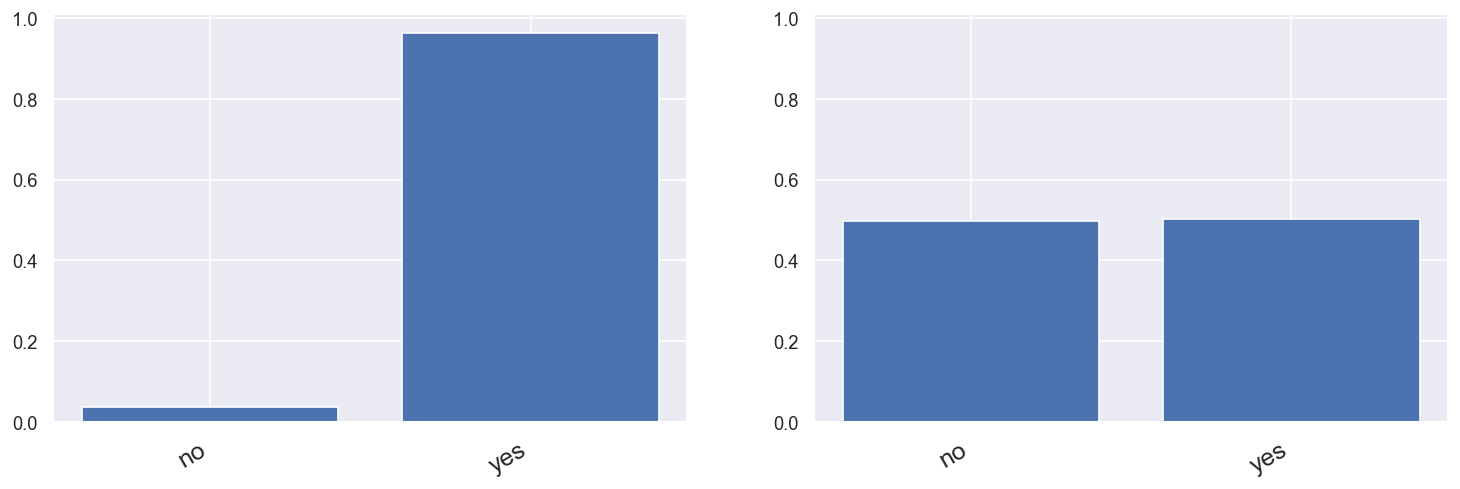

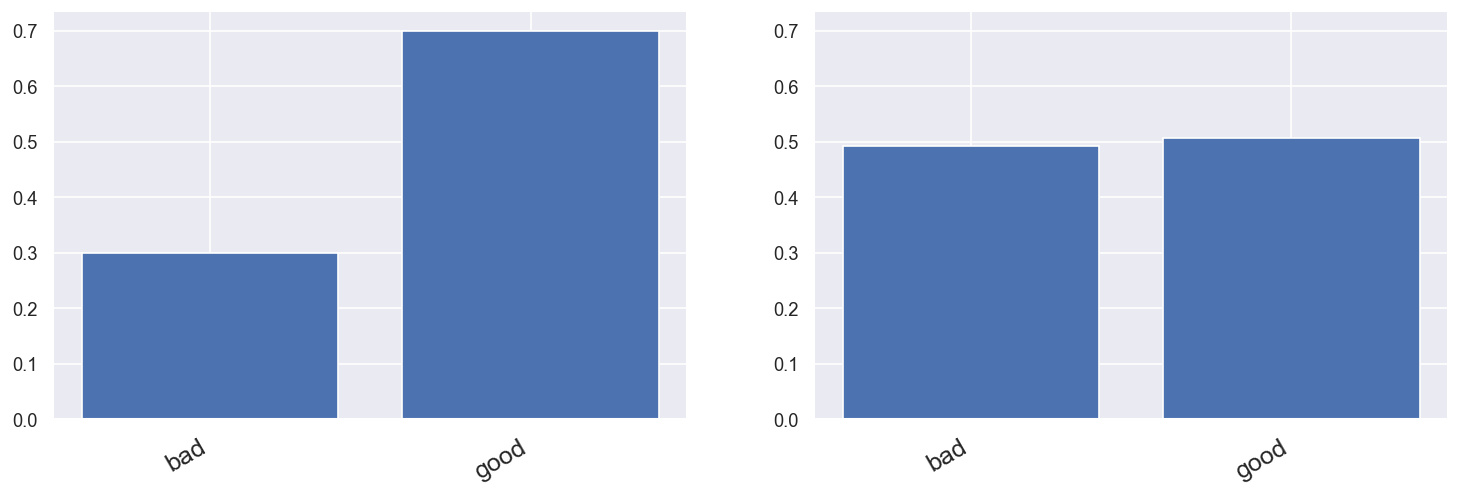

In [7]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

In [9]:
inspector.mutual_information_heatmap()

## Correlated Attribute Mode

## Loading Data

In [8]:
# input dataset
input_data = 'german_credit_data.csv'
# location of two output files
mode = 'correlated_attribute_mode'
description_file = f'{mode}description.json'
synthetic_data = f'{mode}synthetic_data_cam.csv'

In [9]:
#threshold_value
threshold_value = 10

#categorical objects
categorical_attributes = {
    "checking_status": True,
        "duration": False,
        "credit_history":True,
        "purpose": True,
        "credit_amount": False,
        "savings_status":True,
        "employment": True,
        "installment_commitment": False,
        "personal_status": True,
        "other_parties": True,
        "residence_since": False,
        "property_magnitude": True,
        "age": False,
        "other_payment_plans": True,
        "housing": True,
        "existing_credits": False,
        "job": True,
        "num_dependents": False,
        "own_telephone":True,
        "foreign_worker": True,
        "class": True
    
}

epsilon = 0.2

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2


num_tuples_to_generate = 30000 

## Data Describer

In [10]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes
                                                        )
describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT age
Adding attribute residence_since
Adding attribute existing_credits
Adding attribute property_magnitude
Adding attribute other_parties
Adding attribute employment
Adding attribute housing
Adding attribute installment_commitment
Adding attribute foreign_worker
Adding attribute class
Adding attribute credit_amount
Adding attribute job
Adding attribute savings_status
Adding attribute personal_status
Adding attribute own_telephone
Adding attribute checking_status
Adding attribute duration
Adding attribute credit_history
Adding attribute num_dependents
Adding attribute other_payment_plans
Adding attribute purpose
========================== BN constructed ==========================


C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\lib\PrivBayes.py:275: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for parents_instance, stats_sub in stats.groupby(parents):


In [11]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    residence_since        has parents ['age'].
    existing_credits       has parents ['residence_since', 'age'].
    property_magnitude     has parents ['existing_credits', 'residence_since'].
    other_parties          has parents ['existing_credits', 'age'].
    employment             has parents ['property_magnitude', 'existing_credits'].
    housing                has parents ['property_magnitude', 'existing_credits'].
    installment_commitment has parents ['existing_credits', 'age'].
    foreign_worker         has parents ['housing', 'existing_credits'].
    class                  has parents ['foreign_worker', 'existing_credits'].
    credit_amount          has parents ['class', 'age'].
    job                    has parents ['foreign_worker', 'installment_commitment'].
    savings_status         has parents ['class', 'employment'].
    personal_status        has parents ['job', 'property_magnitude'].
    own_telephone          has parents ['job',

## Synthetic data generation

In [12]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

## Model Inspector

In [13]:
# Read both datasets using Pandas.
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']

inspector = ModelInspector(input_df, synthetic_df, attribute_description)

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_synt.iteritems():
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\ModelInspector.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dist_priv.iteritems():
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\DataSynthesizer\ModelInspector.py:85: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, number in dis

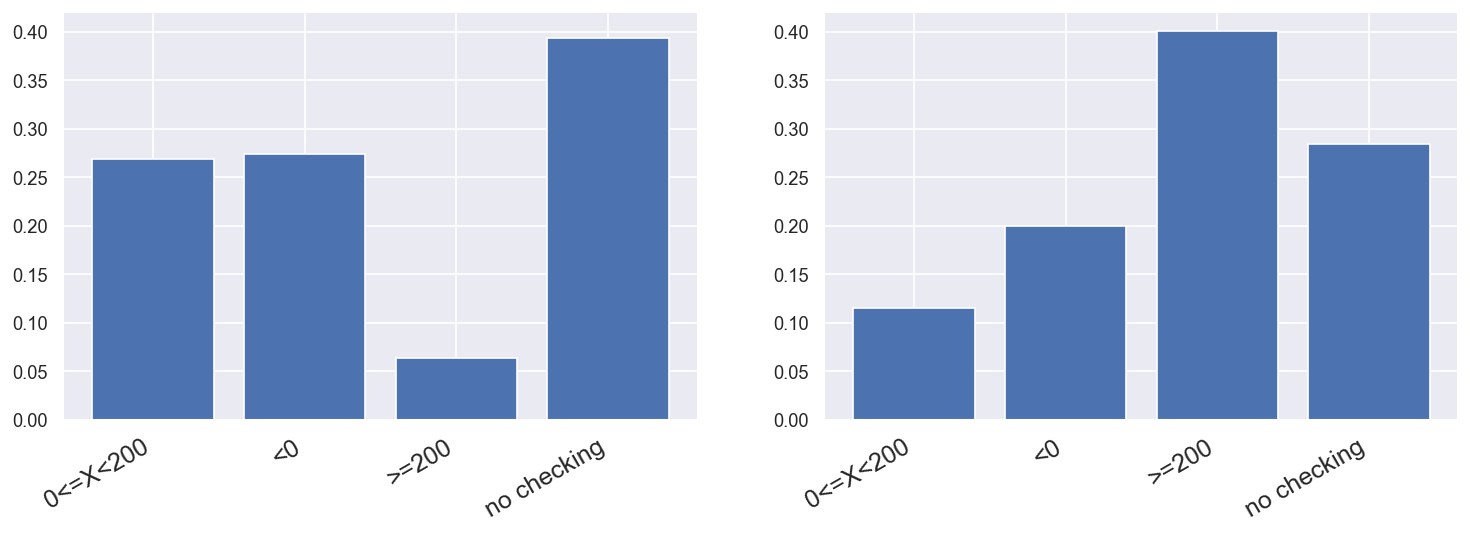

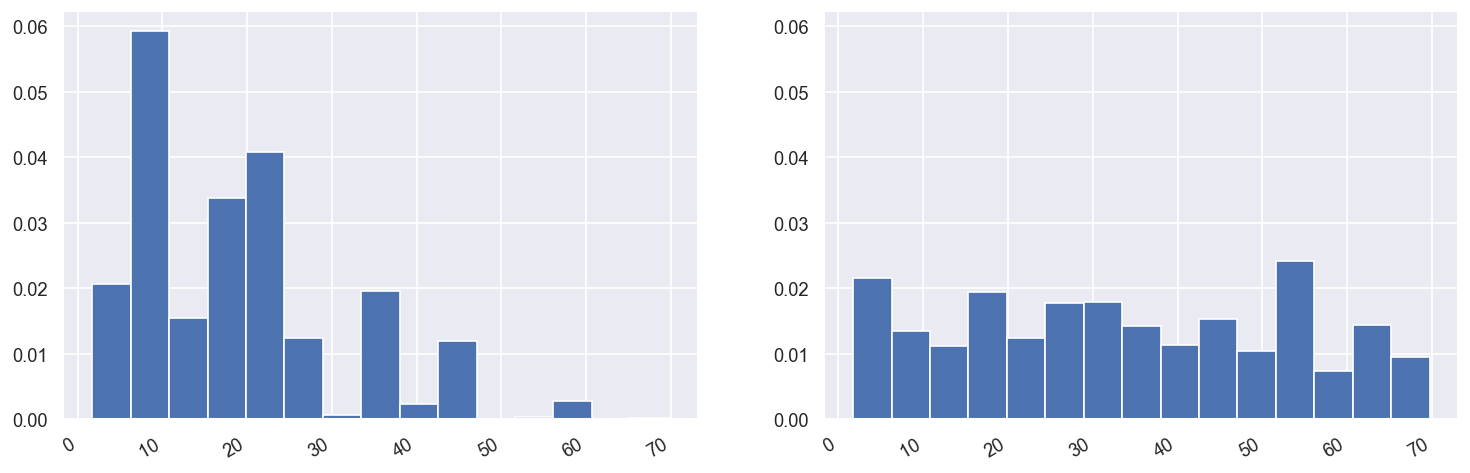

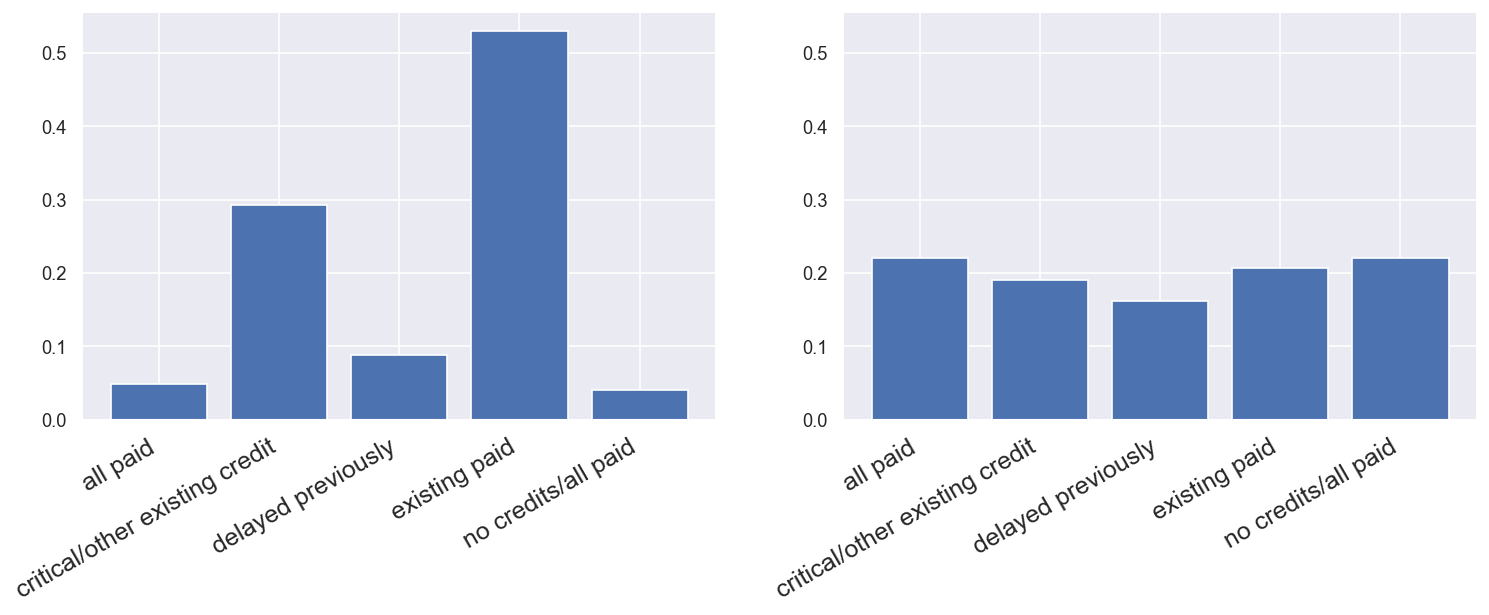

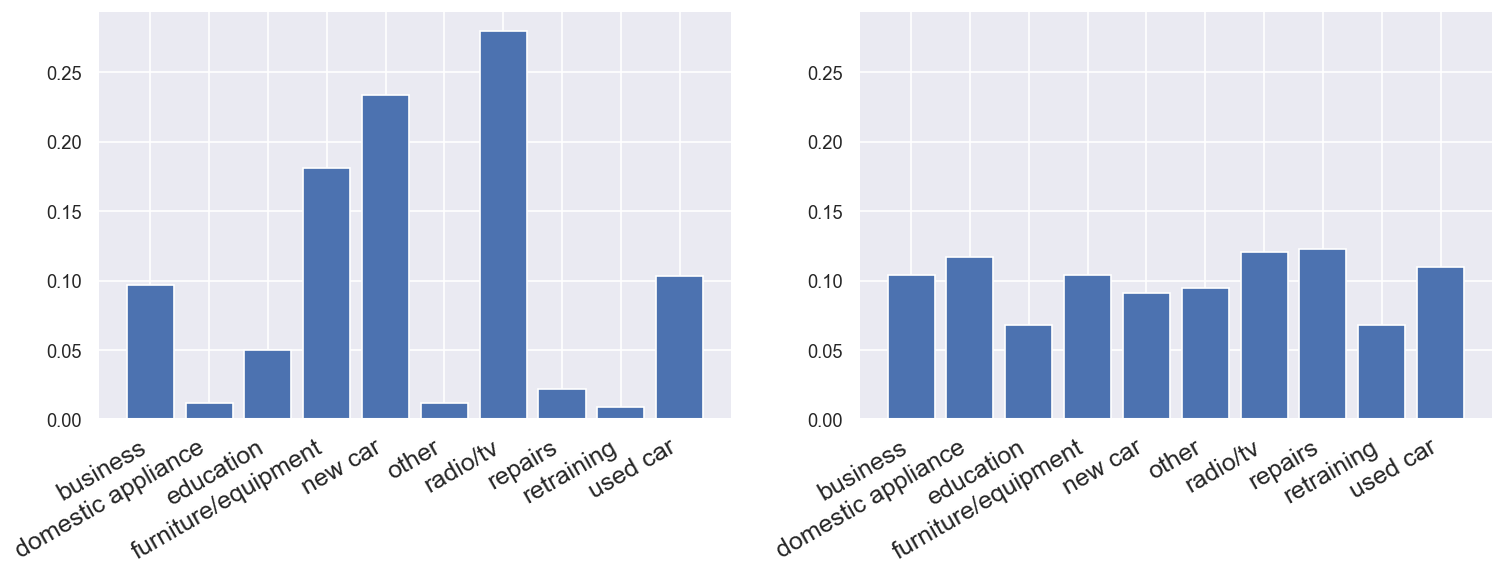

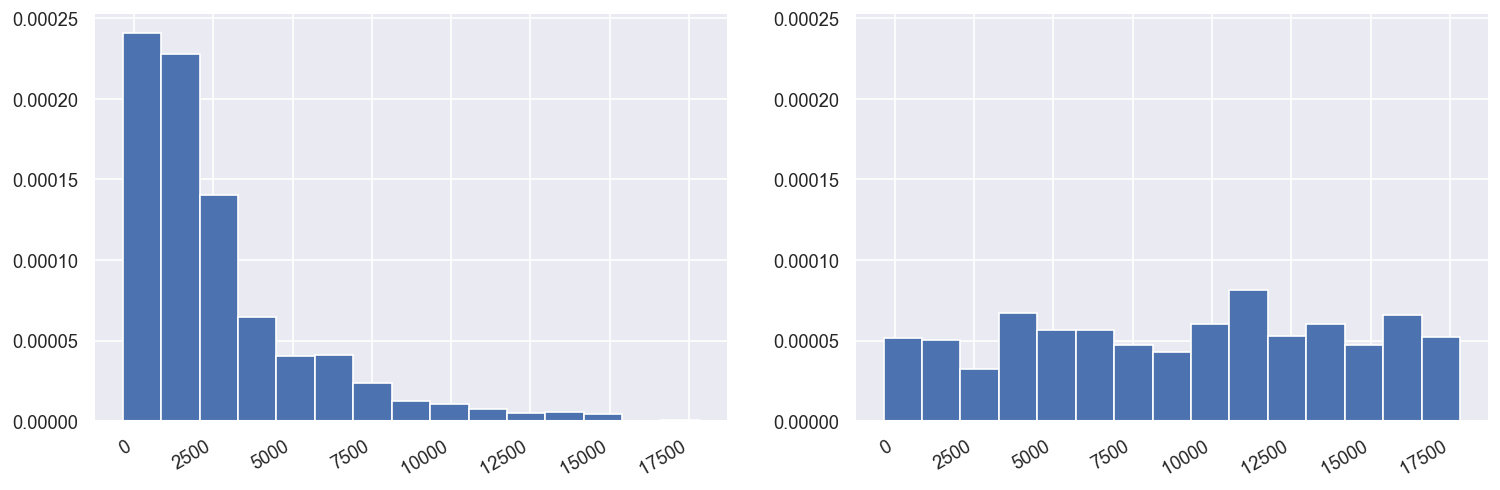

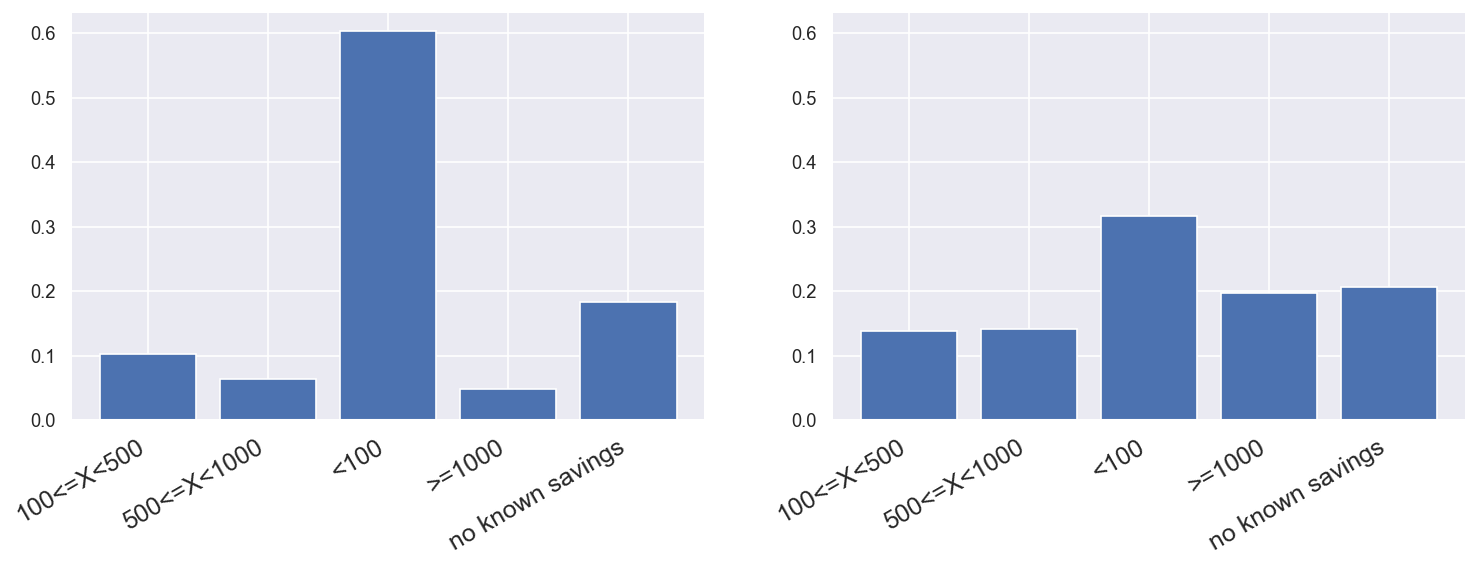

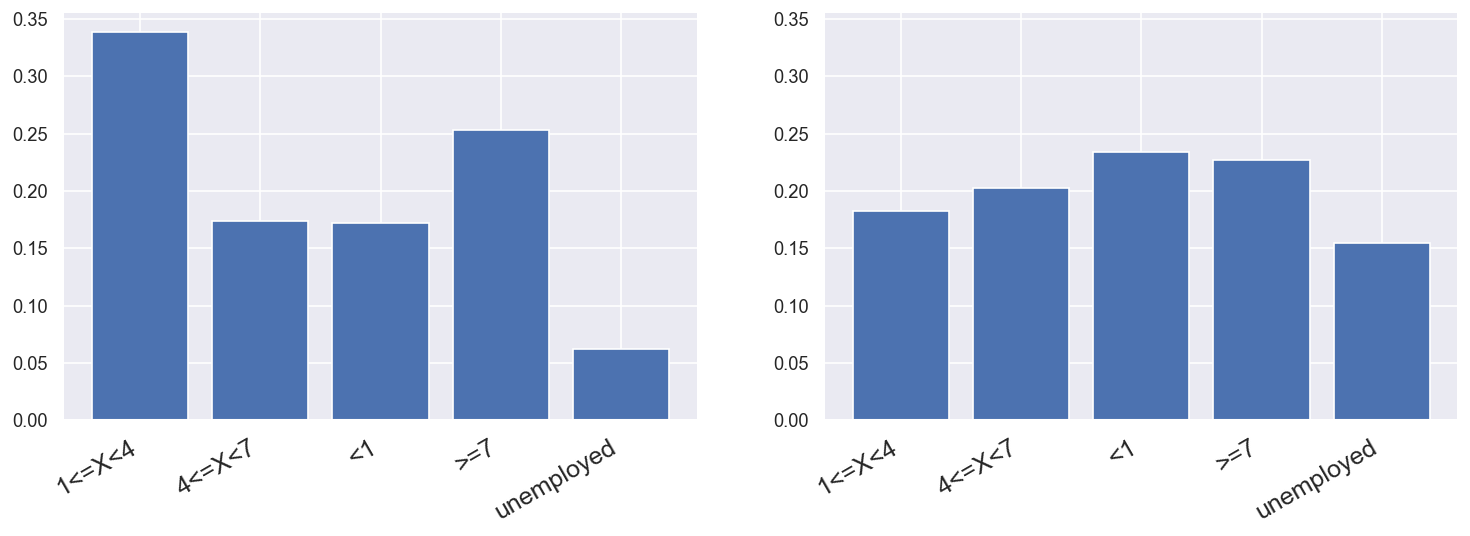

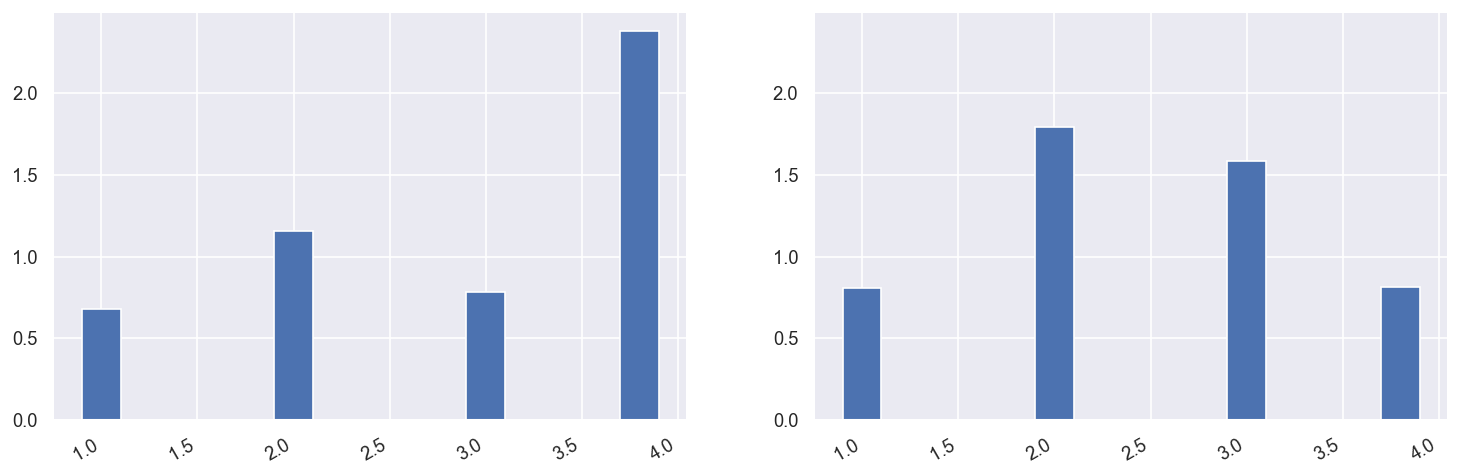

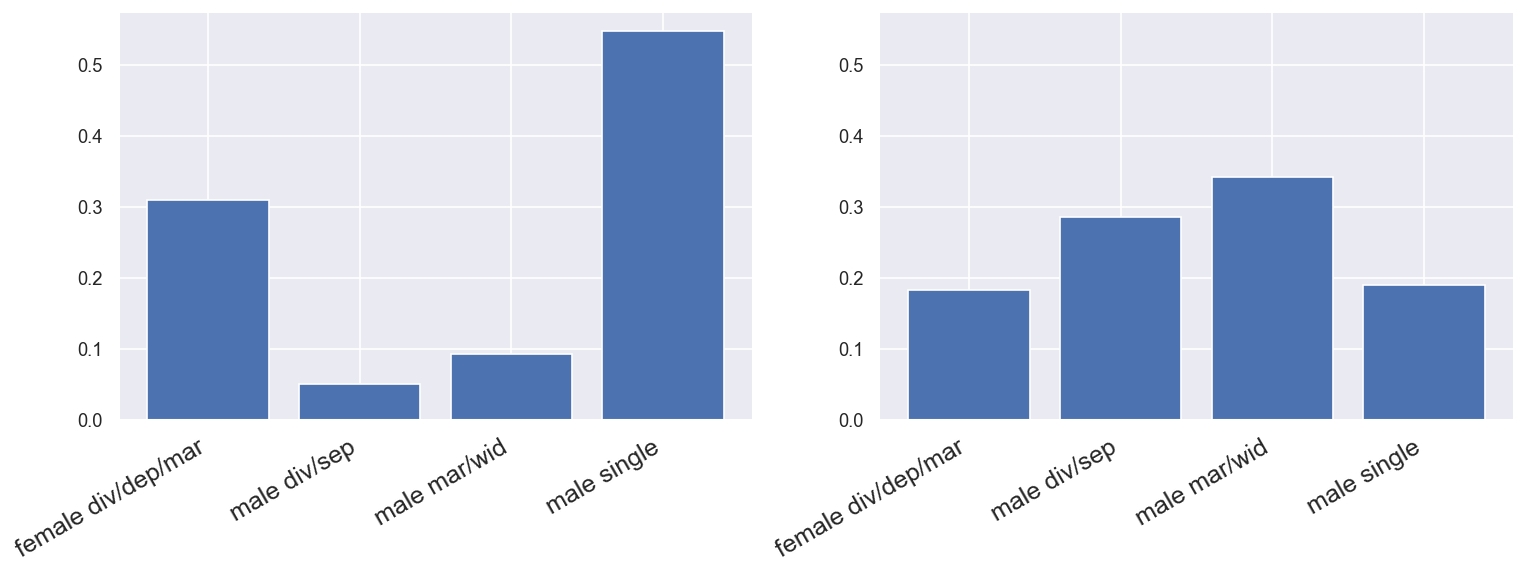

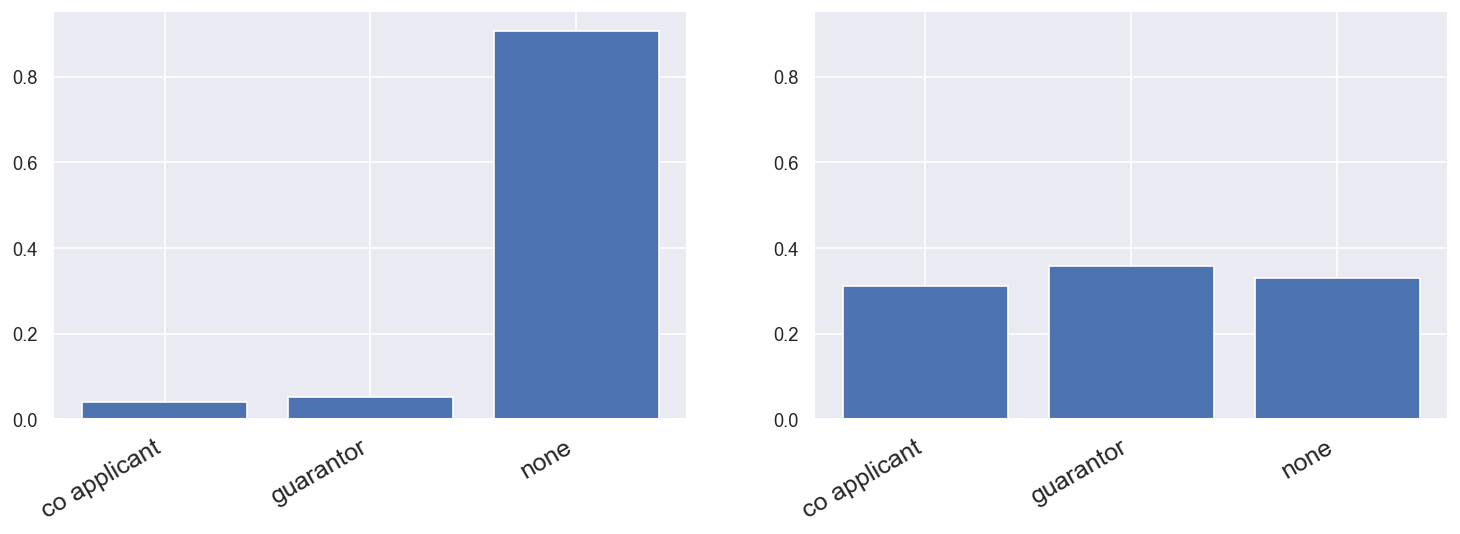

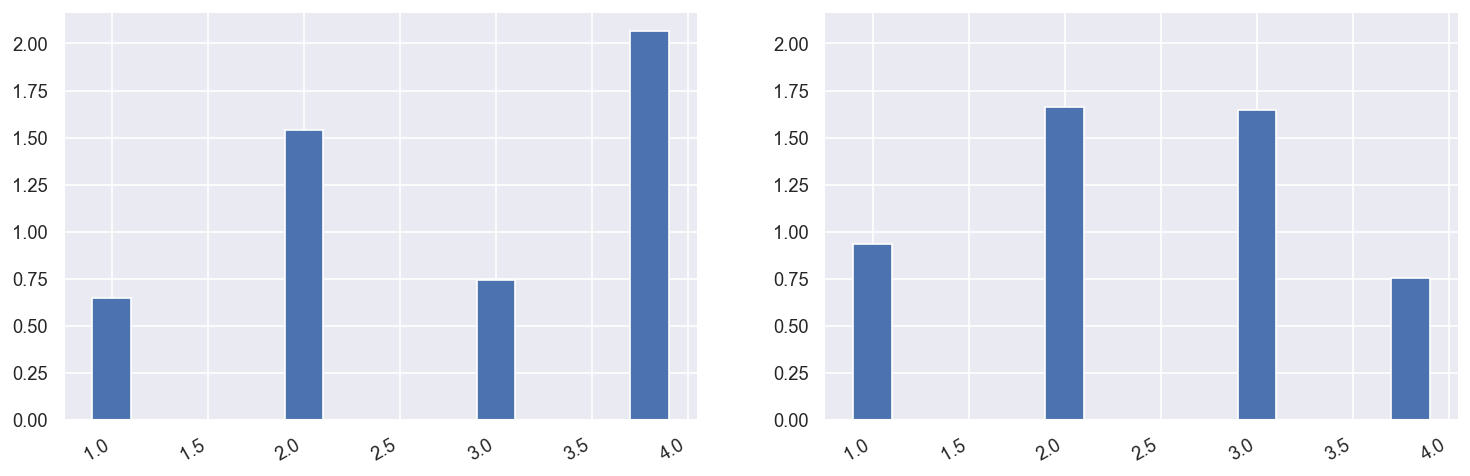

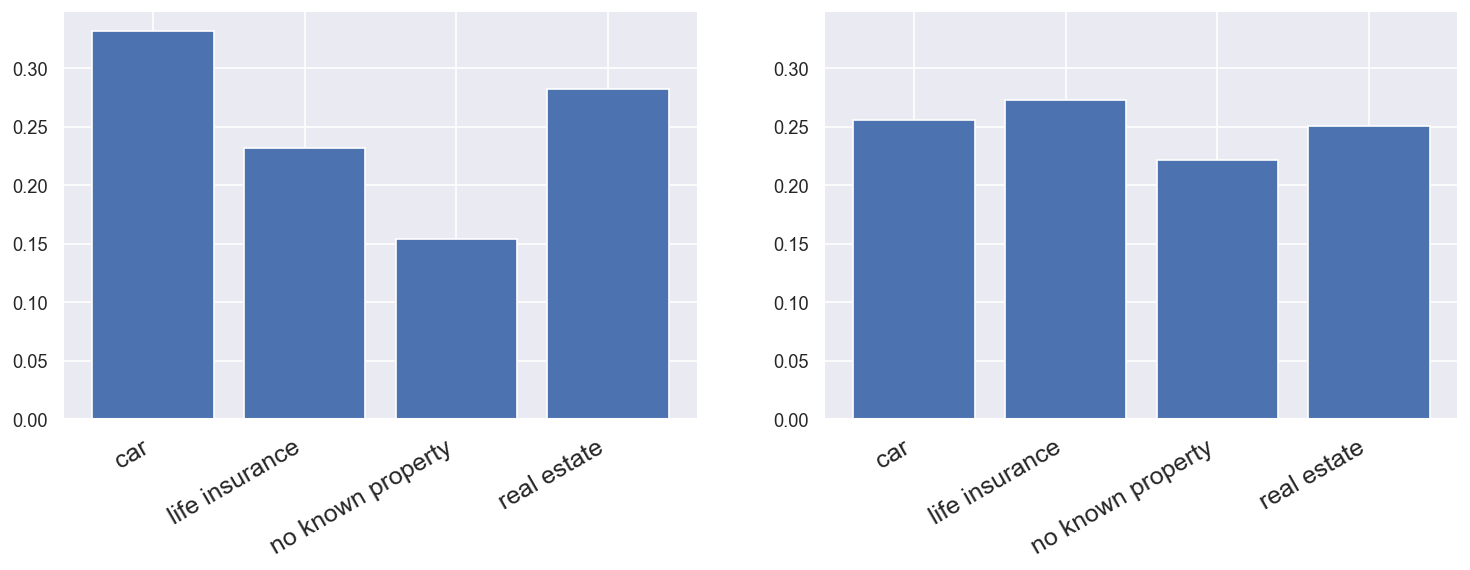

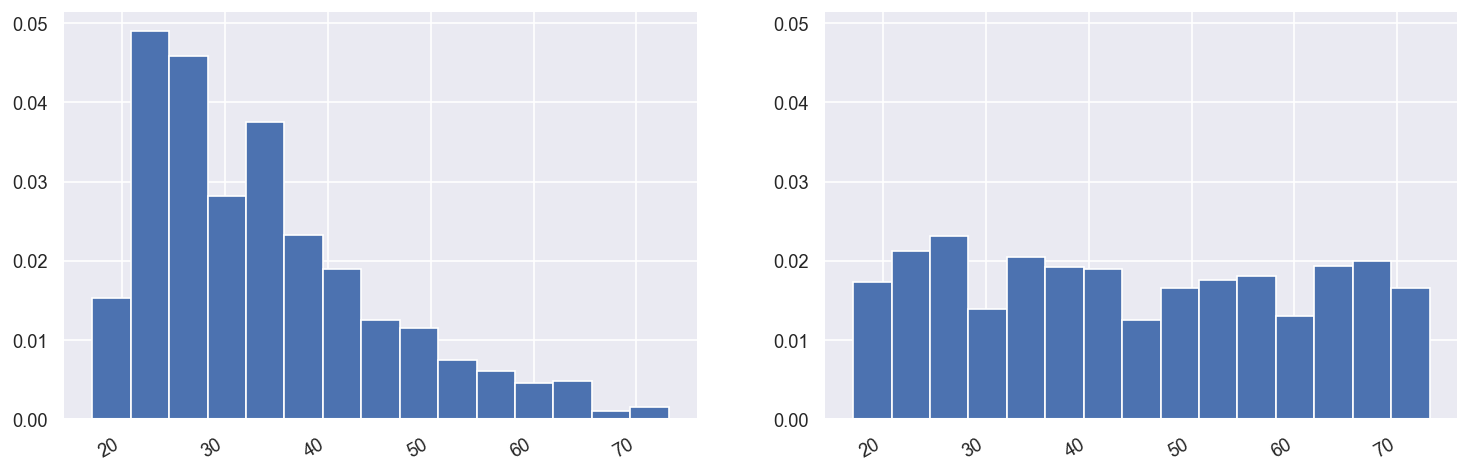

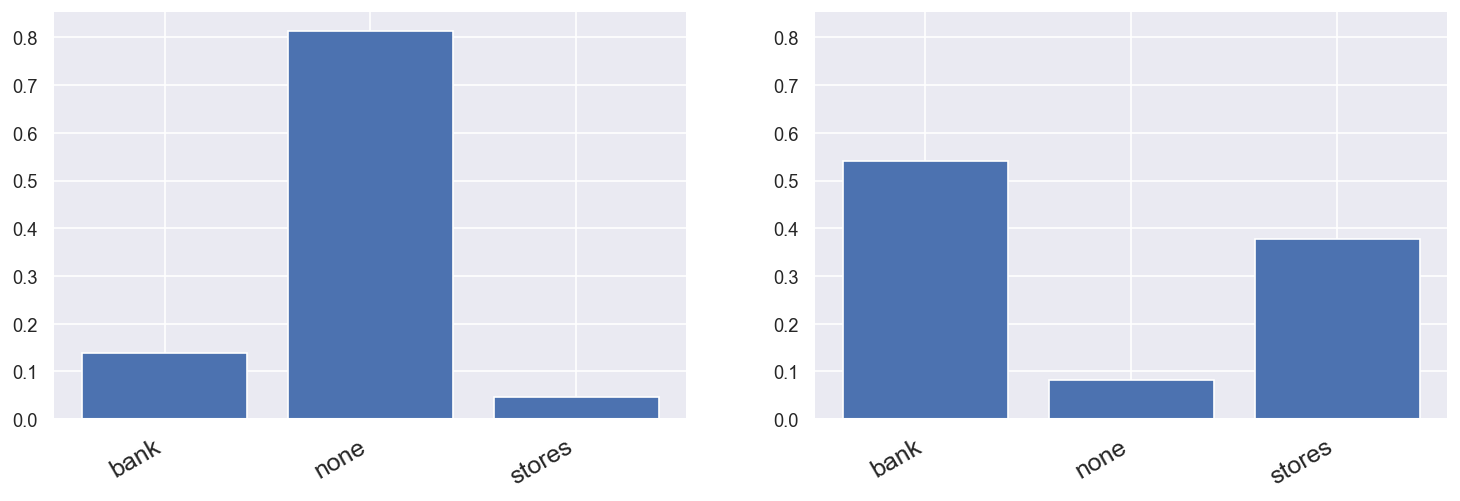

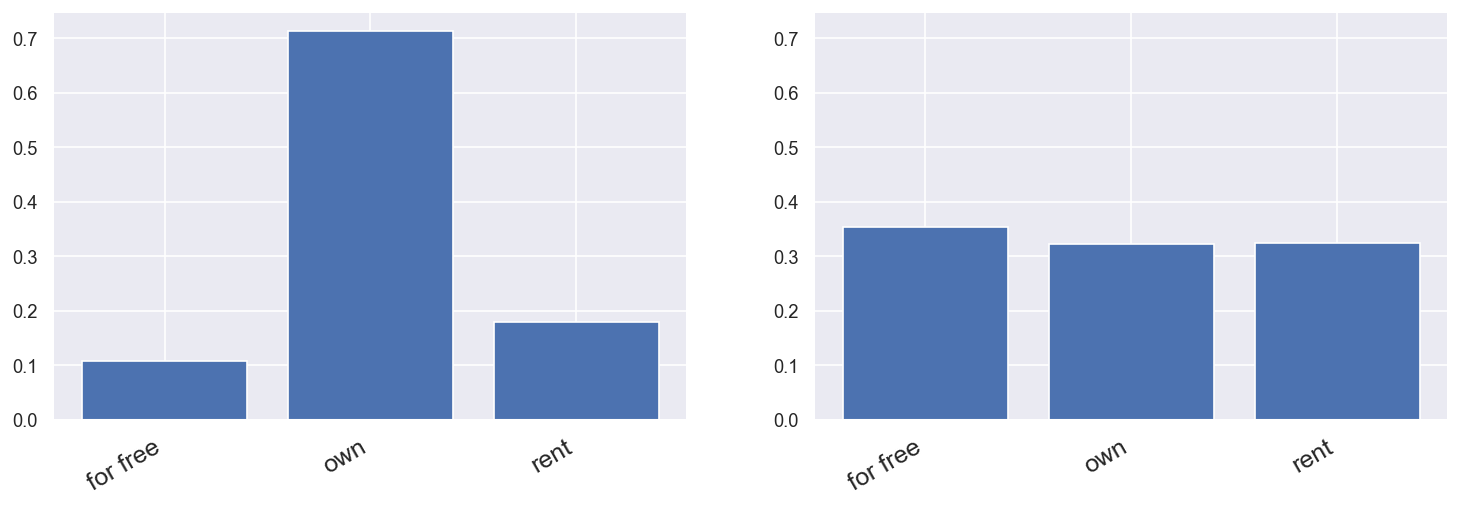

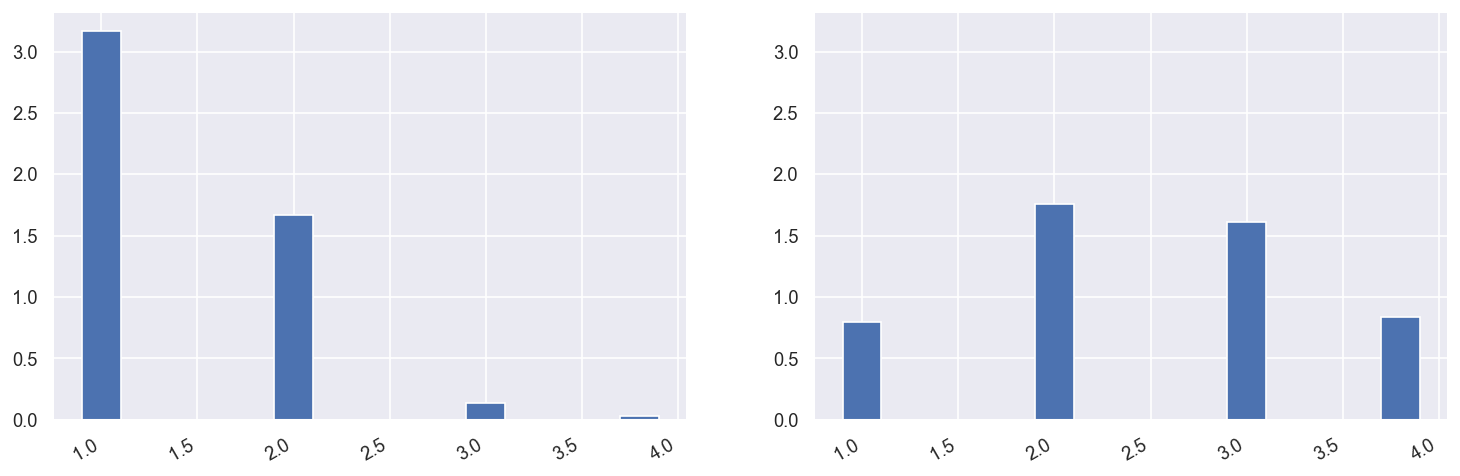

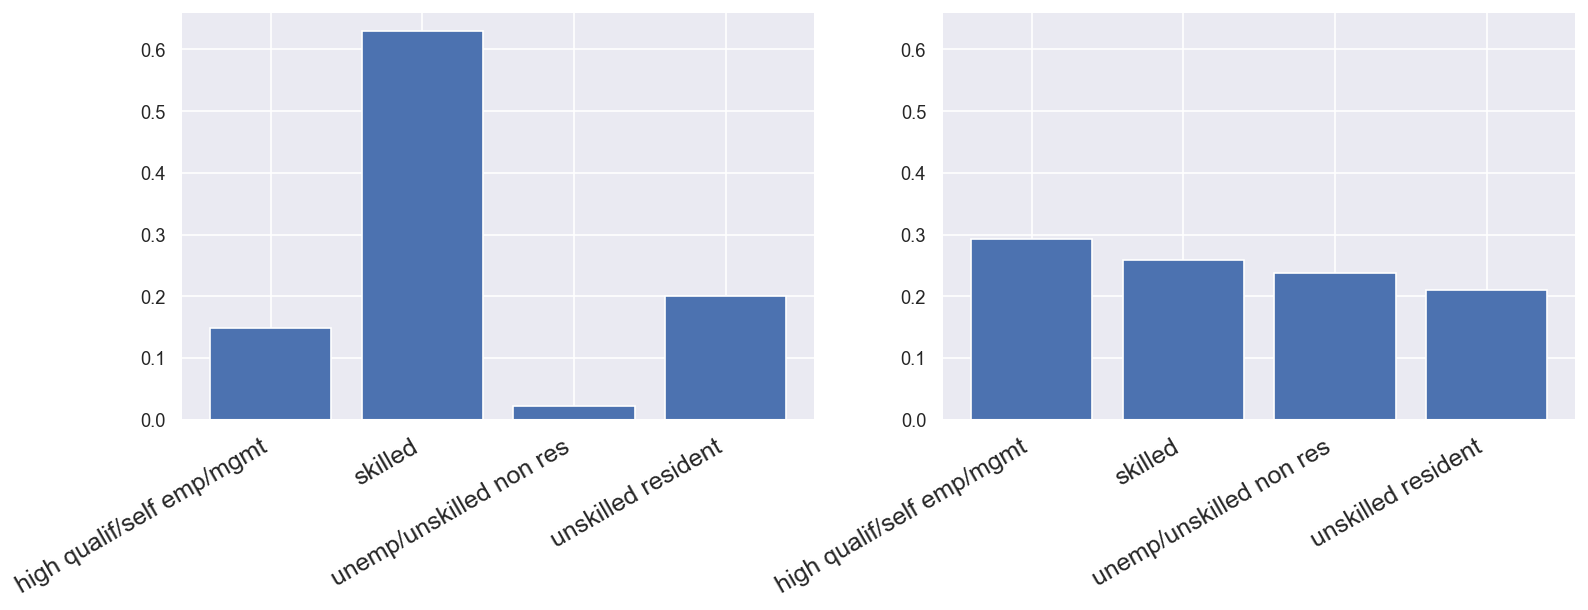

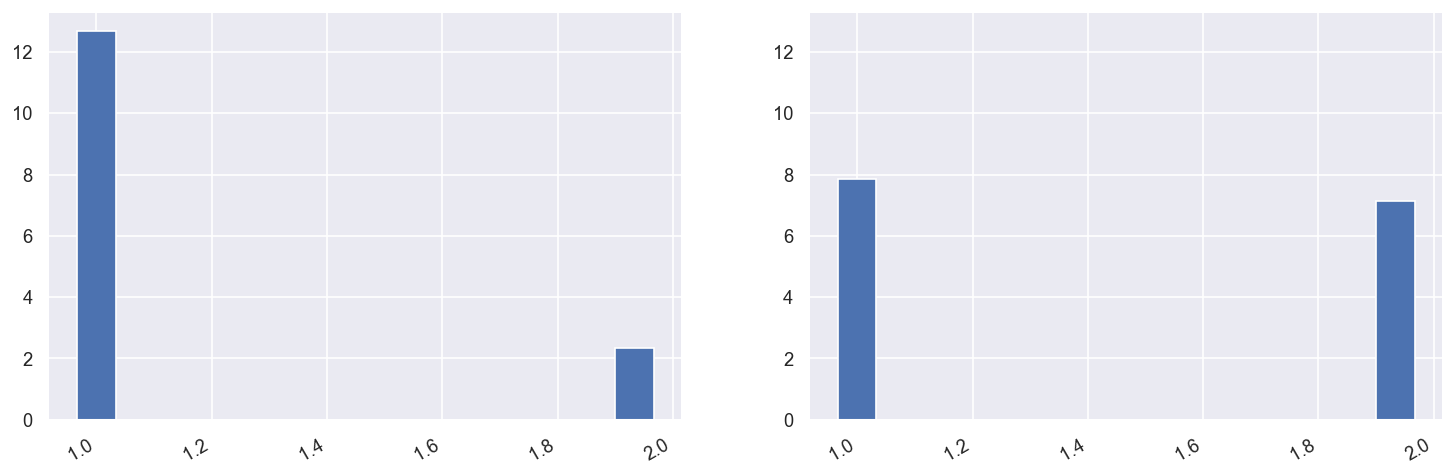

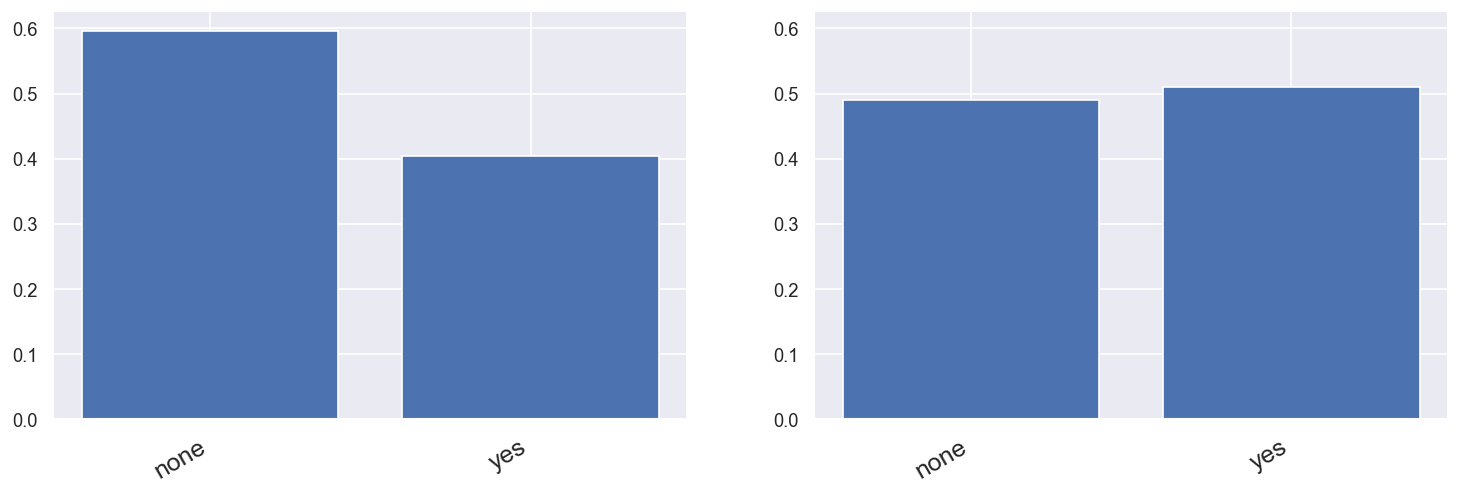

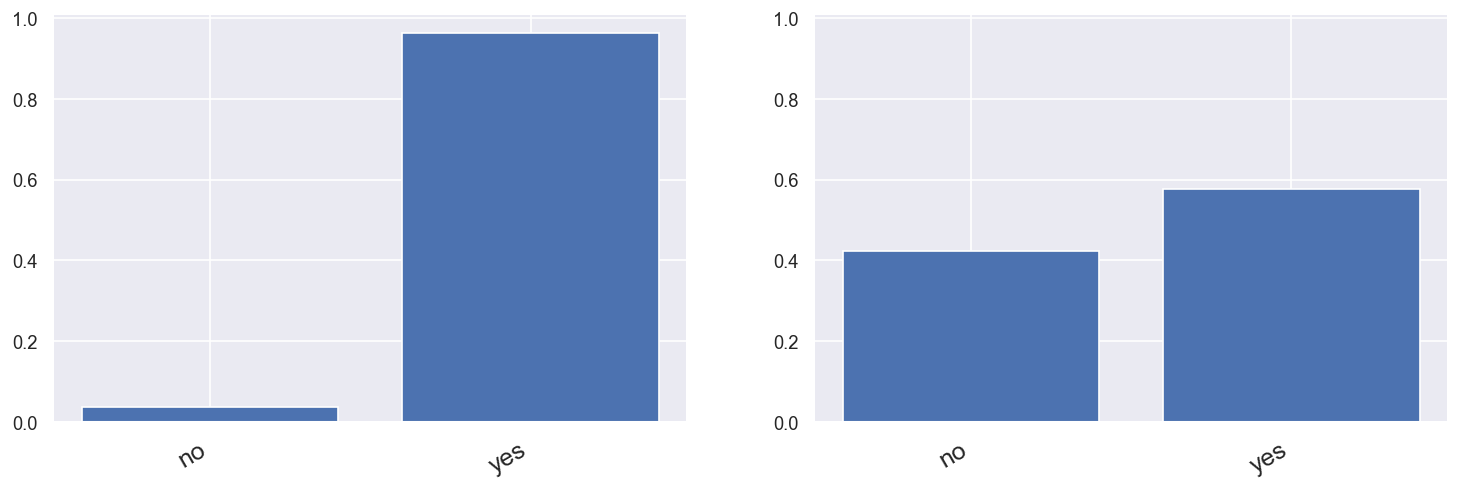

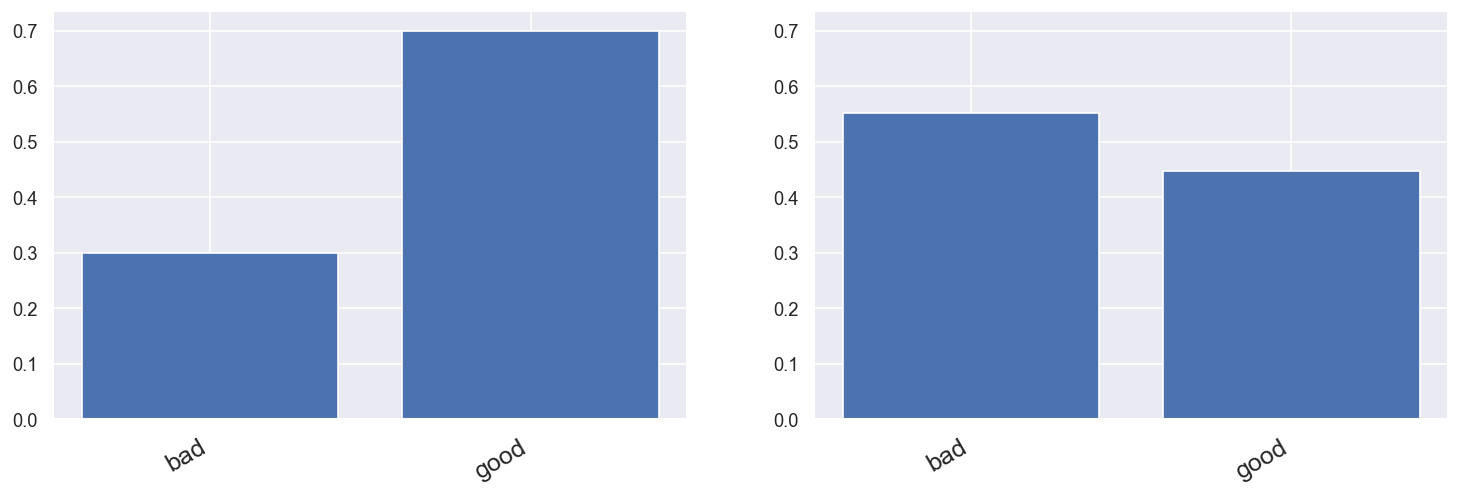

In [14]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

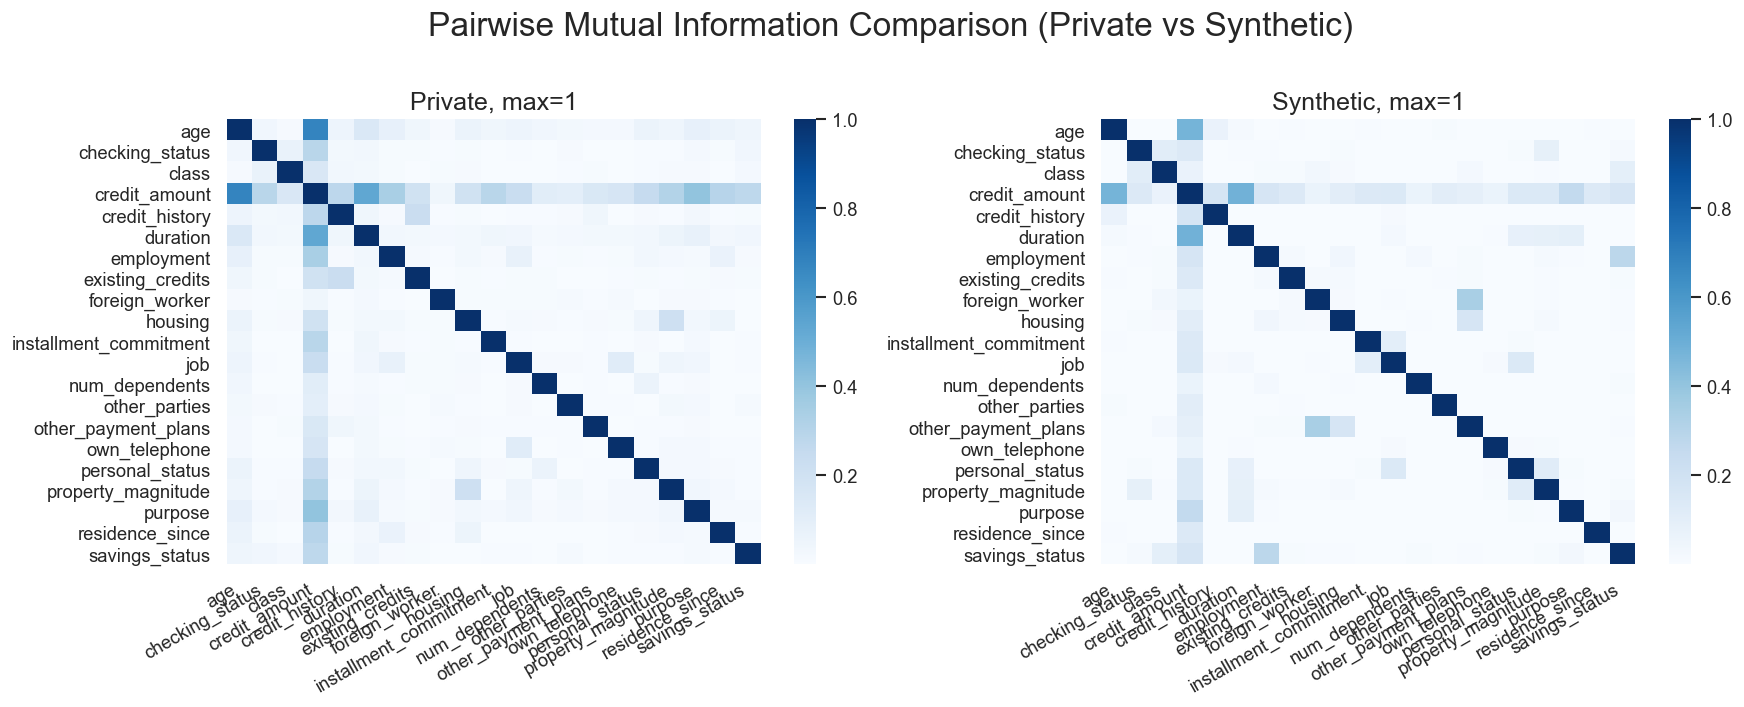

In [15]:
inspector.mutual_information_heatmap()

In [16]:
from sdv.metadata import SingleTableMetadata #this is a function that creates metadata, tries to capture the datatypes 
                                              
metadata = SingleTableMetadata()#creating an empty data table
metadata.detect_from_csv(filepath='german_credit_data.csv') 

In [17]:
metadata #checking metadata

{
    "columns": {
        "checking_status": {
            "sdtype": "categorical"
        },
        "duration": {
            "sdtype": "numerical"
        },
        "credit_history": {
            "sdtype": "categorical"
        },
        "purpose": {
            "sdtype": "categorical"
        },
        "credit_amount": {
            "sdtype": "numerical"
        },
        "savings_status": {
            "sdtype": "categorical"
        },
        "employment": {
            "sdtype": "categorical"
        },
        "installment_commitment": {
            "sdtype": "numerical"
        },
        "personal_status": {
            "sdtype": "categorical"
        },
        "other_parties": {
            "sdtype": "categorical"
        },
        "residence_since": {
            "sdtype": "numerical"
        },
        "property_magnitude": {
            "sdtype": "categorical"
        },
        "age": {
            "sdtype": "numerical"
        },
        "other_payment_plans": 

In [18]:
from sdv.evaluation.single_table import evaluate_quality

quality_report1 = evaluate_quality(
    input_df,
    synthetic_df,
    metadata
)

Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.16it/s]



Overall Quality Score: 58.08%

Properties:
Column Shapes: 63.18%
Column Pair Trends: 52.97%


In [19]:
synthetic_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,>=200,58.0,no credits/all paid,used car,2235.0,<100,4<=X<7,1.0,male div/sep,co applicant,...,life insurance,48.0,stores,for free,3.0,skilled,2.0,none,yes,bad
1,>=200,64.0,critical/other existing credit,furniture/equipment,11952.0,no known savings,4<=X<7,2.0,female div/dep/mar,co applicant,...,life insurance,60.0,stores,own,4.0,unskilled resident,2.0,none,yes,bad
2,>=200,36.0,delayed previously,radio/tv,16862.0,100<=X<500,>=7,2.0,female div/dep/mar,guarantor,...,life insurance,52.0,bank,for free,3.0,skilled,1.0,yes,no,bad
3,no checking,42.0,critical/other existing credit,other,16858.0,no known savings,>=7,2.0,female div/dep/mar,none,...,life insurance,47.0,bank,for free,2.0,unemp/unskilled non res,2.0,yes,yes,good
4,no checking,19.0,all paid,furniture/equipment,13099.0,100<=X<500,>=7,3.0,female div/dep/mar,co applicant,...,no known property,39.0,bank,rent,2.0,unemp/unskilled non res,1.0,none,no,good


In [20]:
real_data=pd.read_csv('german_credit_data.csv')
synthetic_data= pd.read_csv('correlated_attribute_modesynthetic_data_cam.csv')
synthetic_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,>=200,58.0,no credits/all paid,used car,2235.0,<100,4<=X<7,1.0,male div/sep,co applicant,...,life insurance,48.0,stores,for free,3.0,skilled,2.0,none,yes,bad
1,>=200,64.0,critical/other existing credit,furniture/equipment,11952.0,no known savings,4<=X<7,2.0,female div/dep/mar,co applicant,...,life insurance,60.0,stores,own,4.0,unskilled resident,2.0,none,yes,bad
2,>=200,36.0,delayed previously,radio/tv,16862.0,100<=X<500,>=7,2.0,female div/dep/mar,guarantor,...,life insurance,52.0,bank,for free,3.0,skilled,1.0,yes,no,bad
3,no checking,42.0,critical/other existing credit,other,16858.0,no known savings,>=7,2.0,female div/dep/mar,none,...,life insurance,47.0,bank,for free,2.0,unemp/unskilled non res,2.0,yes,yes,good
4,no checking,19.0,all paid,furniture/equipment,13099.0,100<=X<500,>=7,3.0,female div/dep/mar,co applicant,...,no known property,39.0,bank,rent,2.0,unemp/unskilled non res,1.0,none,no,good


In [21]:
quality_report1.get_details('Column Shapes')

,Column,Metric,Quality Score
0,duration,KSComplement,0.559333
1,credit_amount,KSComplement,0.416667
2,installment_commitment,KSComplement,0.687067
3,residence_since,KSComplement,0.737700
4,age,KSComplement,0.682500
5,existing_credits,KSComplement,0.525933
6,num_dependents,KSComplement,0.679533
7,checking_status,TVComplement,0.662133
8,credit_history,TVComplement,0.574933
9,purpose,TVComplement,0.620533


In [24]:
fig=quality_report1.get_visualization(property_name='Column Pair Trends')
fig.show()

In [25]:
from sdv.evaluation.single_table import get_column_plot
fig = get_column_plot(
    real_data=input_df,
    synthetic_data=synthetic_df,
    column_name='credit_history',
    metadata=metadata
)
    
fig.show()